#Capítulo I

# **Librerías necesarias**

Aquí se importan las librerias necesarias para ejecutar el código

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import sklearn
from sklearn.model_selection import train_test_split
from sklearn import metrics

import tensorflow as tf
import tensorflow_datasets as tfds

from tensorflow import keras
from tensorflow.keras.preprocessing.image import array_to_img, img_to_array, load_img, ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

from keras.optimizers import Adam, SGD, RMSprop
from sklearn.metrics import roc_auc_score, f1_score, precision_score, recall_score, confusion_matrix, classification_report

from sklearn.model_selection import StratifiedKFold
from scipy.stats import wilcoxon

import shap

# **Cargar DataSet Colorectal Histology**

Ejecutando este código cargaremos la base de datos con imágenes

In [ ]:
batch_size = 64 # numero de imagenes por iteracion
nb_classes = 2  # 8 si tenemos todo el espacio de soluciones
epochs = 25     # numero de veces que pasa el conjunto de datos a través del modelo
img_rows, img_cols = 32, 32     # escalado de las imagenes resultantes

In [ ]:
def format_example(image):
    image = tf.cast(image, tf.float32)       # castea la imagen a float32 para tratarla
    image = image / 255.0                     # la normaliza a valores entre 0 y 1 -> tiene 256 pixeles --> 16x16 pixeles
    image = tf.image.resize(image, (img_rows, img_cols))      # reescala la imagen de 16x16 a 32x32 pixeles
    return image                                            # devuelve la imagen reescalada


def load_data(name="colorectal_histology"):                           # se le indica en name con que tipo de dataset vamos a trabajar (MNIST, colorectal, etc)
  train_ds = tfds.load(name, split=tfds.Split.TRAIN, batch_size=-1)   # carga el dataset "name", split="tfds.Split.TRAIN" indica lote grande con batch -1 en un solo bloque
  train_ds['image'] = tf.map_fn(format_example, train_ds['image'], dtype=tf.float32)    # hace map de la funcion format_example a cada conjunto de train_ds en float32, normaliza y redimensiona en paralelo
  numpy_ds = tfds.as_numpy(train_ds)        # convierte a numpy array para trabajar con funciones numpy
  X, y = numpy_ds['image'], numpy_ds['label']     # X = Imagenes, y = etiquetas

  return np.array(X), np.array(y)         # las devuelve

# **Muestra del contenido del DataSet**

Aquí podremos visualizar cuál es el contenido de nuestro DataSet

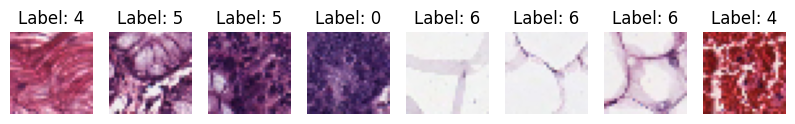

In [ ]:
def show_images(X, y, num_images):
    plt.figure(figsize=(10, 10))  # Tamaño de la figura para la visualización
    for i in range(num_images):
        ax = plt.subplot(1, num_images, i + 1)
        plt.imshow(X[i])  # Muestra la imagen i-ésima
        plt.title(f'Label: {y[i]}')  # Muestra la etiqueta correspondiente
        plt.axis("off")  # Oculta los ejes para mayor claridad
    plt.show()

X, y = load_data()

show_images(X, y, num_images=8)

# Análisis de los distintos parámetros de la red

Estudiamos los distintos parámetros de la red

In [ ]:
"""
################################
#
#        BATCH_SIZE = 32
#
################################

# Contenidos de las variables
# X_train: 80% de las imágenes originales
# X_test: 20% de las imagenes de prueba originales
# y_train: Etiquetas verdaderas de X_train
# y_test: Etiquetas verdaderas de X_test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=24)    # utilizamos 20% prueba 80% entrenamiento con aleatoriedad 24

model = create_model()    # creamos el modelo

history = model.fit(X_train, y_train, epochs=epochs, batch_size=32)               # entrenamos el modelo

y_pred = model.predict(X_test)    # realizamos las predicciones con el modelo entrenado

# Cálculo de AUC

auc = roc_auc_score(y_test, y_pred)    # Calculamos el área bajo la curva ROC
print(f"Resultado de la métrica AUC: {auc:.5f}")

# Cálculo de F1

f1 = f1_score(y_test, np.round(y_pred))    # Calculamos la puntuación F1
print(f"Resultado de la métrica F1: {f1:.5f}")

# Cálculo de Precisión y Recall (otras comparativas)
precision = precision_score(y_test, np.round(y_pred))
recall = recall_score(y_test, np.round(y_pred))

print(f"Resultado de la métrica Precision: {precision:.4f}")    # Predice los que son tumores y de esos calcula los que son de verdad
print(f"Resultado de la métrica Recall: {recall:.4f}")                                  # De los que realmente son tumores calcula cuántos ha predicho que son de verdad tumores
"""

'\n################################\n#\n#        BATCH_SIZE = 32\n#\n################################\n\n# Contenidos de las variables\n# X_train: 80% de las imágenes originales\n# X_test: 20% de las imagenes de prueba originales\n# y_train: Etiquetas verdaderas de X_train\n# y_test: Etiquetas verdaderas de X_test\n\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=24)    # utilizamos 20% prueba 80% entrenamiento con aleatoriedad 24\n\nmodel = create_model()    # creamos el modelo\n\nhistory = model.fit(X_train, y_train, epochs=epochs, batch_size=32)               # entrenamos el modelo\n\ny_pred = model.predict(X_test)    # realizamos las predicciones con el modelo entrenado\n\n# Cálculo de AUC\n\nauc = roc_auc_score(y_test, y_pred)    # Calculamos el área bajo la curva ROC\nprint(f"Resultado de la métrica AUC: {auc:.5f}")\n\n# Cálculo de F1\n\nf1 = f1_score(y_test, np.round(y_pred))    # Calculamos la puntuación F1\nprint(f"Resultado de la métrica

In [ ]:
"""
################################
#
#        BATCH_SIZE = 64
#
################################

# Contenidos de las variables
# X_train: 80% de las imágenes originales
# X_test: 20% de las imagenes de prueba originales
# y_train: Etiquetas verdaderas de X_train
# y_test: Etiquetas verdaderas de X_test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=24)    # utilizamos 20% prueba 80% entrenamiento con aleatoriedad 24

model = create_model()    # creamos el modelo

history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size)               # entrenamos el modelo

y_pred = model.predict(X_test)    # realizamos las predicciones con el modelo entrenado

# Cálculo de AUC

auc_64 = roc_auc_score(y_test, y_pred)    # Calculamos el área bajo la curva ROC
print(f"Resultado de la métrica AUC: {auc:.5f}")

# Cálculo de F1

f1_64 = f1_score(y_test, np.round(y_pred))    # Calculamos la puntuación F1
print(f"Resultado de la métrica F1: {f1:.5f}")

# Cálculo de Precisión y Recall (otras comparativas)
precision_64 = precision_score(y_test, np.round(y_pred))
recall_64 = recall_score(y_test, np.round(y_pred))

print(f"Resultado de la métrica Precision: {precision:.4f}")    # Predice los que son tumores y de esos calcula los que son de verdad
print(f"Resultado de la métrica Recall: {recall:.4f}")                                  # De los que realmente son tumores calcula cuántos ha predicho que son de verdad tumores
"""

'\n################################\n#\n#        BATCH_SIZE = 64\n#\n################################\n\n# Contenidos de las variables\n# X_train: 80% de las imágenes originales\n# X_test: 20% de las imagenes de prueba originales\n# y_train: Etiquetas verdaderas de X_train\n# y_test: Etiquetas verdaderas de X_test\n\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=24)    # utilizamos 20% prueba 80% entrenamiento con aleatoriedad 24\n\nmodel = create_model()    # creamos el modelo\n\nhistory = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size)               # entrenamos el modelo\n\ny_pred = model.predict(X_test)    # realizamos las predicciones con el modelo entrenado\n\n# Cálculo de AUC\n\nauc_64 = roc_auc_score(y_test, y_pred)    # Calculamos el área bajo la curva ROC\nprint(f"Resultado de la métrica AUC: {auc:.5f}")\n\n# Cálculo de F1\n\nf1_64 = f1_score(y_test, np.round(y_pred))    # Calculamos la puntuación F1\nprint(f"Resultado

Gráfica comparativa del batch_size 32 y batch_size 64

In [ ]:
"""
metricas = ['AUC', 'F1 Score', 'Precision', 'Recall']

values_32 = [auc, f1, precision, recall]
values_64 = [auc_64, f1_64, precision_64, recall_64]

x = np.arange(len(metricas))
width = 0.35  # Ancho de las barras

plt.figure(figsize=(10, 6))
plt.bar(x - width/2, values_32, width, label='Batch Size = 32', color='blue')
plt.bar(x + width/2, values_64, width, label='Batch Size = 64', color='green')

plt.xlabel('Métricas')
plt.ylabel('Valores')
plt.title('Comparación de Métricas para Distintos Batch Sizes (32 vs 64)')
plt.xticks(x, metricas)
plt.ylim(0, 1)  # Limitar el eje Y de 0 a 1 para métricas entre 0 y 1
plt.legend(loc='lower right', bbox_to_anchor=(1.15, 1))  # Mover la leyenda fuera del gráfico

plt.show()
"""

"\nmetricas = ['AUC', 'F1 Score', 'Precision', 'Recall']\n\nvalues_32 = [auc, f1, precision, recall]\nvalues_64 = [auc_64, f1_64, precision_64, recall_64]\n\nx = np.arange(len(metricas))\nwidth = 0.35  # Ancho de las barras\n\nplt.figure(figsize=(10, 6))\nplt.bar(x - width/2, values_32, width, label='Batch Size = 32', color='blue')\nplt.bar(x + width/2, values_64, width, label='Batch Size = 64', color='green')\n\nplt.xlabel('Métricas')\nplt.ylabel('Valores')\nplt.title('Comparación de Métricas para Distintos Batch Sizes (32 vs 64)')\nplt.xticks(x, metricas)\nplt.ylim(0, 1)  # Limitar el eje Y de 0 a 1 para métricas entre 0 y 1\nplt.legend(loc='lower right', bbox_to_anchor=(1.15, 1))  # Mover la leyenda fuera del gráfico\n\nplt.show()\n"

Estudio de las épocas

In [ ]:
"""
################################
#
#        EPOCHS = 25
#
################################

# Contenidos de las variables
# X_train: 80% de las imágenes originales
# X_test: 20% de las imagenes de prueba originales
# y_train: Etiquetas verdaderas de X_train
# y_test: Etiquetas verdaderas de X_test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=24)    # utilizamos 20% prueba 80% entrenamiento con aleatoriedad 24

model = create_model()    # creamos el modelo

history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size)               # entrenamos el modelo

y_pred = model.predict(X_test)    # realizamos las predicciones con el modelo entrenado

# Cálculo de AUC

auc = roc_auc_score(y_test, y_pred)    # Calculamos el área bajo la curva ROC
print(f"Resultado de la métrica AUC: {auc:.5f}")

# Cálculo de F1

f1 = f1_score(y_test, np.round(y_pred))    # Calculamos la puntuación F1
print(f"Resultado de la métrica F1: {f1:.5f}")

# Cálculo de Precisión y Recall (otras comparativas)
precision = precision_score(y_test, np.round(y_pred))
recall = recall_score(y_test, np.round(y_pred))

print(f"Resultado de la métrica Precision: {precision:.4f}")    # Predice los que son tumores y de esos calcula los que son de verdad
print(f"Resultado de la métrica Recall: {recall:.4f}")                                  # De los que realmente son tumores calcula cuántos ha predicho que son de verdad tumores
"""

'\n################################\n#\n#        EPOCHS = 25\n#\n################################\n\n# Contenidos de las variables\n# X_train: 80% de las imágenes originales\n# X_test: 20% de las imagenes de prueba originales\n# y_train: Etiquetas verdaderas de X_train\n# y_test: Etiquetas verdaderas de X_test\n\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=24)    # utilizamos 20% prueba 80% entrenamiento con aleatoriedad 24\n\nmodel = create_model()    # creamos el modelo\n\nhistory = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size)               # entrenamos el modelo\n\ny_pred = model.predict(X_test)    # realizamos las predicciones con el modelo entrenado\n\n# Cálculo de AUC\n\nauc = roc_auc_score(y_test, y_pred)    # Calculamos el área bajo la curva ROC\nprint(f"Resultado de la métrica AUC: {auc:.5f}")\n\n# Cálculo de F1\n\nf1 = f1_score(y_test, np.round(y_pred))    # Calculamos la puntuación F1\nprint(f"Resultado de la mét

In [ ]:
"""
################################
#
#        EPOCHS = 50
#
################################

# Contenidos de las variables
# X_train: 80% de las imágenes originales
# X_test: 20% de las imagenes de prueba originales
# y_train: Etiquetas verdaderas de X_train
# y_test: Etiquetas verdaderas de X_test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=24)    # utilizamos 20% prueba 80% entrenamiento con aleatoriedad 24

model = create_model()    # creamos el modelo

history = model.fit(X_train, y_train, epochs=50, batch_size=batch_size)               # entrenamos el modelo

y_pred = model.predict(X_test)    # realizamos las predicciones con el modelo entrenado

# Cálculo de AUC

auc_50 = roc_auc_score(y_test, y_pred)    # Calculamos el área bajo la curva ROC
print(f"Resultado de la métrica AUC: {auc:.5f}")

# Cálculo de F1

f1_50 = f1_score(y_test, np.round(y_pred))    # Calculamos la puntuación F1
print(f"Resultado de la métrica F1: {f1:.5f}")

# Cálculo de Precisión y Recall (otras comparativas)
precision_50 = precision_score(y_test, np.round(y_pred))
recall_50 = recall_score(y_test, np.round(y_pred))

print(f"Resultado de la métrica Precision: {precision:.4f}")    # Predice los que son tumores y de esos calcula los que son de verdad
print(f"Resultado de la métrica Recall: {recall:.4f}")                                  # De los que realmente son tumores calcula cuántos ha predicho que son de verdad tumores
"""

'\n################################\n#\n#        EPOCHS = 50\n#\n################################\n\n# Contenidos de las variables\n# X_train: 80% de las imágenes originales\n# X_test: 20% de las imagenes de prueba originales\n# y_train: Etiquetas verdaderas de X_train\n# y_test: Etiquetas verdaderas de X_test\n\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=24)    # utilizamos 20% prueba 80% entrenamiento con aleatoriedad 24\n\nmodel = create_model()    # creamos el modelo\n\nhistory = model.fit(X_train, y_train, epochs=50, batch_size=batch_size)               # entrenamos el modelo\n\ny_pred = model.predict(X_test)    # realizamos las predicciones con el modelo entrenado\n\n# Cálculo de AUC\n\nauc_50 = roc_auc_score(y_test, y_pred)    # Calculamos el área bajo la curva ROC\nprint(f"Resultado de la métrica AUC: {auc:.5f}")\n\n# Cálculo de F1\n\nf1_50 = f1_score(y_test, np.round(y_pred))    # Calculamos la puntuación F1\nprint(f"Resultado de la m

Gráfica comparativa de las épocas

In [ ]:
"""
metricas = ['AUC', 'F1 Score', 'Precision', 'Recall']

values_25 = [auc, f1, precision, recall]
values_50 = [auc_50, f1_50, precision_50, recall_50]

x = np.arange(len(metricas))
width = 0.35  # Ancho de las barras

plt.figure(figsize=(10, 6))
plt.bar(x - width/2, values_25, width, label='Epochs = 25', color='blue')
plt.bar(x + width/2, values_50, width, label='Epochs = 50', color='green')

plt.xlabel('Métricas')
plt.ylabel('Valores')
plt.title('Comparación de Métricas para Distintas Epochs (25 vs 50)')
plt.xticks(x, metricas)
plt.ylim(0, 1)  # Limitar el eje Y de 0 a 1 para métricas entre 0 y 1
plt.legend(loc='lower right', bbox_to_anchor=(1.15, 1))  # Mover la leyenda fuera del gráfico

plt.show()
"""

"\nmetricas = ['AUC', 'F1 Score', 'Precision', 'Recall']\n\nvalues_25 = [auc, f1, precision, recall]\nvalues_50 = [auc_50, f1_50, precision_50, recall_50]\n\nx = np.arange(len(metricas))\nwidth = 0.35  # Ancho de las barras\n\nplt.figure(figsize=(10, 6))\nplt.bar(x - width/2, values_25, width, label='Epochs = 25', color='blue')\nplt.bar(x + width/2, values_50, width, label='Epochs = 50', color='green')\n\nplt.xlabel('Métricas')\nplt.ylabel('Valores')\nplt.title('Comparación de Métricas para Distintas Epochs (25 vs 50)')\nplt.xticks(x, metricas)\nplt.ylim(0, 1)  # Limitar el eje Y de 0 a 1 para métricas entre 0 y 1\nplt.legend(loc='lower right', bbox_to_anchor=(1.15, 1))  # Mover la leyenda fuera del gráfico\n\nplt.show()\n"

Concluimos que usaremos como batch_size = 64 y epochs = 25

Comparación de los distintos optimizers

In [ ]:
"""
# Definimos la función para crear el modelo a entrenar con distintos optimizers (clasificación binaria)
def create_model_aux(optimizer):
    model = Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_rows, img_cols, 3)),    # aplicamos filtros a imagenes de 32x32 con activacion relu
        layers.MaxPooling2D(pool_size=(2, 2)),                                                # aplicamos max pooling para reducir dimensionalidad
        layers.Flatten(),                                                                     # aplanamos
        layers.Dense(128, activation='relu'),                                                 # aplicamos una capa oculta de 128 neuronas con activacion relu
        layers.Dense(1, activation='sigmoid')                                                 # utilizamos sigmoid para clasificación binaria
    ])
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])        # binary_crossentropy porque tenemos clasificación binaria
    return model
  """

"\n# Definimos la función para crear el modelo a entrenar con distintos optimizers (clasificación binaria)\ndef create_model_aux(optimizer):\n    model = Sequential([\n        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_rows, img_cols, 3)),    # aplicamos filtros a imagenes de 32x32 con activacion relu\n        layers.MaxPooling2D(pool_size=(2, 2)),                                                # aplicamos max pooling para reducir dimensionalidad\n        layers.Flatten(),                                                                     # aplanamos\n        layers.Dense(128, activation='relu'),                                                 # aplicamos una capa oculta de 128 neuronas con activacion relu\n        layers.Dense(1, activation='sigmoid')                                                 # utilizamos sigmoid para clasificación binaria\n    ])\n    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])        # binary_crossen

In [ ]:
"""
################################
#
#    COMPARATIVA DE OPTIMIZERS
#
################################

# Contenidos de las variables
# X_train: 80% de las imágenes originales
# X_test: 20% de las imagenes de prueba originales
# y_train: Etiquetas verdaderas de X_train
# y_test: Etiquetas verdaderas de X_test

optimizers = {
    'Adam': Adam(),
    'SGD con Momentum': SGD(momentum=0.9),
    'RMSprop': RMSprop()
}

auc_values = []
f1_values = []
precision_values = []
recall_values = []

for nombre, optimizer in optimizers.items():
    print(f"Entrenando con {nombre} optimizer...")
    model = create_model(optimizer)
    history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size)  # entrenamos el modelo
    y_pred = model.predict(X_test)    # realizamos las predicciones con el modelo entrenado

    auc = roc_auc_score(y_test, y_pred)
    f1 = f1_score(y_test, np.round(y_pred))
    precision = precision_score(y_test, np.round(y_pred))
    recall = recall_score(y_test, np.round(y_pred))

    auc_values.append(auc)
    f1_values.append(f1)
    precision_values.append(precision)
    recall_values.append(recall)

    print(f"Resultado de la métrica AUC: {auc:.5f}")
    print(f"Resultado de la métrica F1: {f1:.5f}")
    print(f"Resultado de la métrica Precision: {precision:.4f}")
    print(f"Resultado de la métrica Recall: {recall:.4f}")
    """

'\n################################\n#\n#    COMPARATIVA DE OPTIMIZERS\n#\n################################\n\n# Contenidos de las variables\n# X_train: 80% de las imágenes originales\n# X_test: 20% de las imagenes de prueba originales\n# y_train: Etiquetas verdaderas de X_train\n# y_test: Etiquetas verdaderas de X_test\n\noptimizers = {\n    \'Adam\': Adam(),\n    \'SGD con Momentum\': SGD(momentum=0.9),\n    \'RMSprop\': RMSprop()\n}\n\nauc_values = []\nf1_values = []\nprecision_values = []\nrecall_values = []\n\nfor nombre, optimizer in optimizers.items():\n    print(f"Entrenando con {nombre} optimizer...")\n    model = create_model_aux(optimizer)\n    history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size)  # entrenamos el modelo\n    y_pred = model.predict(X_test)    # realizamos las predicciones con el modelo entrenado\n\n    auc = roc_auc_score(y_test, y_pred)\n    f1 = f1_score(y_test, np.round(y_pred))\n    precision = precision_score(y_test, np.round(y_pre

Gráfica comparativa de los distintos optimizers

In [ ]:
"""
# Representación gráfica de las métricas comparativas
metricas = ['AUC', 'F1 Score', 'Precision', 'Recall']
nombres = list(optimizers.keys())

# Valores de las métricas para cada optimizador
data = [auc_values, f1_values, precision_values, recall_values]

x = np.arange(len(nombres))
width = 0.2  # Ancho de las barras

plt.figure(figsize=(12, 8))
for i, metric in enumerate(metricas):
    plt.bar(x + i * width, data[i], width, label=metric)

# Configuraciones del gráfico
plt.xlabel('Optimizers')
plt.ylabel('Valores de las Métricas')
plt.title('Comparación de Optimizers para Diferentes Métricas')
plt.xticks(x + width, nombres)
plt.ylim(0, 1)  # Limitar el eje Y de 0 a 1 para métricas entre 0 y 1
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()
"""

"\n# Representación gráfica de las métricas comparativas\nmetricas = ['AUC', 'F1 Score', 'Precision', 'Recall']\nnombres = list(optimizers.keys())\n\n# Valores de las métricas para cada optimizador\ndata = [auc_values, f1_values, precision_values, recall_values]\n\nx = np.arange(len(nombres))\nwidth = 0.2  # Ancho de las barras\n\nplt.figure(figsize=(12, 8))\nfor i, metric in enumerate(metricas):\n    plt.bar(x + i * width, data[i], width, label=metric)\n\n# Configuraciones del gráfico\nplt.xlabel('Optimizers')\nplt.ylabel('Valores de las Métricas')\nplt.title('Comparación de Optimizers para Diferentes Métricas')\nplt.xticks(x + width, nombres)\nplt.ylim(0, 1)  # Limitar el eje Y de 0 a 1 para métricas entre 0 y 1\nplt.legend(loc='upper left', bbox_to_anchor=(1, 1))\nplt.show()\n"

Concluimos que utilizaremos SGD con Momentum como optimizer

## **Básico**

Clasificación binaria sobre si el tejido está identificado como TUMOR (etiquetado como 0) respecto del resto de tejidos (etiquetados del 1 al 7)

In [ ]:
#################################################
#
#                  MAIN
#
##################################################

X, y = load_data()        # en y tenemos las etiquetas de las imagenes (lo que son verdaderamente)

if nb_classes == 2:       # convertimos las etiquetas que no son tumor a clase 1 --> NO ES TUMOR, las de clase 0 --> ES TUMOR
  y[y>0] = 1

# Comprobaciones de lo que observamos arriba
print(f"Contenido de la etiqueta 4 (Tumor): {y[3]}")
print(f"Contenido de la etiqueta 1 (No tumor): {y[0]}")

# Ver distribución de clases
unique, counts = np.unique(y, return_counts=True)
print(f"Distribución de clases: {dict(zip(unique, counts))}")

Contenido de la etiqueta 4 (Tumor): 0
Contenido de la etiqueta 1 (No tumor): 1
Distribución de clases: {0: 625, 1: 4375}


Gráfica comparativa de la distribución de clases

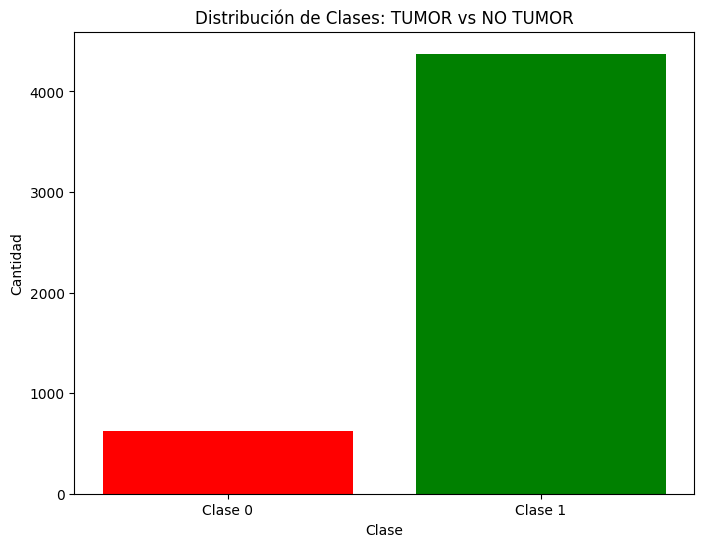

In [ ]:
#################################################
#
#          Gráfica comparativa de clases
#
##################################################

# Extraer etiquetas y cantidades
labels = [f'Clase {int(label)}' for label in unique]

# Crear la gráfica de barras
plt.figure(figsize=(8, 6))
plt.bar(labels, counts, color=['red', 'green'])
plt.xlabel('Clase')
plt.ylabel('Cantidad')
plt.title('Distribución de Clases: TUMOR vs NO TUMOR')
plt.show()


Dado que tendremos un desequilibrio considerable con las clases estudiaremos sólo la métrica AUC y opcionalmente la F1

In [ ]:
#################################################
#
#                Creación del modelo
#
##################################################

# Definimos la función para crear el modelo a entrenar (clasificación binaria)

def create_model(optimizer='sgd_momentum'):
    if optimizer == 'adam':         # comprobación de los optimizadores usados para wilcoxon, etc
        optimizer_usado = Adam()
    elif optimizer == 'sgd':
        optimizer_usado = SGD()
    elif optimizer == 'sgd_momentum':
        optimizer_usado = SGD(momentum=0.9)
    elif optimizer == 'rmsprop':
        optimizer_usado = RMSprop()
    else:
        raise ValueError("Optimizer no soportado. Por favor, elige entre 'adam', 'sgd', 'sgd_momentum' o 'rmsprop'.")

    model = Sequential([
      layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_rows, img_cols, 3)),    # aplicamos filtros a imagenes de 32x32 con activacion relu
      layers.MaxPooling2D(pool_size=(2, 2)),                                                # aplicamos max pooling para reducir dimensionalidad
      layers.Flatten(),                                                                     # aplanamos
      layers.Dense(128, activation='relu'),                                                 # aplicamos una capa oculta de 128 neuronas con activacion relu
      layers.Dense(1, activation='sigmoid')                                                 # utilizamos sigmoid para clasificación binaria
    ])
    model.compile(optimizer=optimizer_usado, loss='binary_crossentropy', metrics=['accuracy'])        # binary_crossentropy porque tenemos clasificación binaria
    return model

In [ ]:
#################################################
#
#  Entrenamiento del modelo y obtención de AUC y F1
#
##################################################

# Contenidos de las variables
# X_train: 80% de las imágenes originales
# X_test: 20% de las imagenes de prueba originales
# y_train: Etiquetas verdaderas de X_train
# y_test: Etiquetas verdaderas de X_test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=24)     # utilizamos 20% prueba 80% entrenamiento con aleatoriedad 24
model = create_model()                                                                        # creamos el modelo
history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size)                   # entrenamos el modelo
y_pred = model.predict(X_test)                                                                # realizamos las predicciones con el modelo entrenado

auc = roc_auc_score(y_test, y_pred)                                                           # calculamos AUC
print(f"Resultado de la métrica AUC: {auc:.5f}")
f1 = f1_score(y_test, np.round(y_pred))                                                       # calculamos F1
print(f"Resultado de la métrica F1: {f1:.5f}")

y_pred_redondeado = np.round(y_pred)                                                          # redondear las predicciones para que sean 0 o 1
matriz_confusion = confusion_matrix(y_test, y_pred_redondeado)
print(f"Matriz de Confusión:\n{matriz_confusion}\n")                                          # mostramos la matriz de confusion

target_names = ['TUMOR', 'HEALTHY'] if nb_classes ==  2 else ['TUMOR','STROMA','COMPLEX','LYMPHO','DEBRIS','MUCOSA','ADIPOSE','EMPTY']
print(classification_report(y_test, y_pred_redondeado, target_names=target_names))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/25
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.8264 - loss: 0.3737
Epoch 2/25
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8763 - loss: 0.2547
Epoch 3/25
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8813 - loss: 0.2531
Epoch 4/25
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8920 - loss: 0.2286
Epoch 5/25
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8961 - loss: 0.2089
Epoch 6/25
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9122 - loss: 0.1954
Epoch 7/25
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9093 - loss: 0.2169
Epoch 8/25
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9217 - loss: 0.1738
Epoch 9/25
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9240 - loss: 0.1713
Epoch 10/25
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9291 - loss: 0.1788
Epoch 11/25
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9441 - loss: 0.1479
Epoch 12/25
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9442 - l

Aplicación de la validación cruzada 10-CV

In [ ]:
#################################################
#
#    Aplicación de la validación cruzada 10-CV
#
##################################################

skf = StratifiedKFold(n_splits=10) # dividimos el dataset en 10 pliegues manteniendo la proporción entre clases
auc_scores_10cv = []   # guardamos el area bajo la curva en cada pliegue

for train_index, test_index in skf.split(X, y):
    X_train, X_test = X[train_index], X[test_index]   # dividimos datos en entrenamiento y prueba
    y_train, y_test = y[train_index], y[test_index]

    model = None
    model = create_model()                              # creamos un nuevo modelo en cada pliegue
    model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size,\
              verbose=0, validation_data=(X_test, y_test))  # entrenamos el modelo actual

    y_pred = model.predict(X_test).ravel()       # realiza predicciones  sobre los datos de prueba y lo aplana a unidimensional
    auc_10cv = roc_auc_score(y_test, y_pred)     # area bajo la curva roc
    auc_scores_10cv.append(auc_10cv)             # guardamos los valores de AUC en cada split para graficar

print(f"Media de AUC (10-CV): {np.mean(auc_scores_10cv):.4f} en los {skf.get_n_splits()} pliegues")  # mostramos la media de 10-CV
print(f"Desviación estándar de AUC (10-CV): {np.std(auc_scores_10cv):.4f} en los {skf.get_n_splits()} pliegues")  # mostramos la desviación estándar de 10-CV

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Media de AUC (10-CV): 0.9737 en los 10 pliegues
Desviación estándar de AUC (10-CV): 0.0081 en los 10 pliegues


Gráfica comparativa de la desviación de AUC en cada pliegue de 10-CV

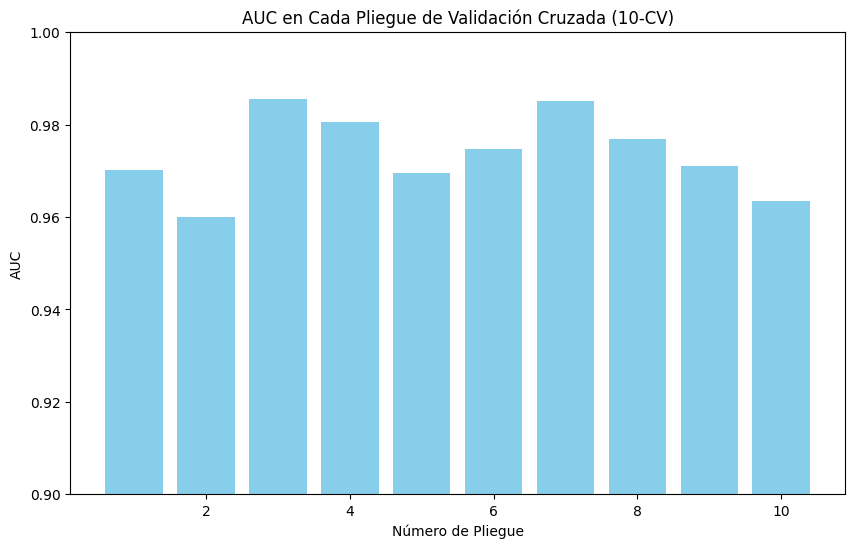

In [ ]:
#######################################################
#
#   Gráfica comparativa de la desviación estándar 10CV
#
########################################################

plt.figure(figsize=(10, 6))
plt.bar(range(1, 11), auc_scores_10cv, color='skyblue')
plt.xlabel('Número de Pliegue')
plt.ylabel('AUC')
plt.title('AUC en Cada Pliegue de Validación Cruzada (10-CV)')
plt.ylim(0.9, 1.0)  # Ajuste del rango para visualizar bien los valores
plt.show()

Estudio estadístico de Wilcoxon

Vamos a comparar los distintos optimizadores con 10-CV (Adam, SGD with Momentum, SGD, RMSprop)

In [ ]:
#####################################################
#
#   Cálculo de AUC para cada optimizador
#
#####################################################

optimizers = ['adam', 'sgd', 'rmsprop', 'sgd_momentum']
auc_results_per_optimizer = {}           # diccionario para guardar optimizador y resultados de auc

for nombre in optimizers:
  skf = StratifiedKFold(n_splits=10)      # numero de splits
  auc_results_per_optimizer[nombre] = []      # inicializamos cada lista de auc por optimizer a vacio
  print(f"Entrenando con {nombre} optimizer...")
  for train_index, test_index in skf.split(X, y):
    X_train, X_test = X[train_index], X[test_index]   # dividimos datos en entrenamiento y prueba
    y_train, y_test = y[train_index], y[test_index]

    model = None
    model = create_model(optimizer=nombre)         # creamos el modelo con el optimizer
    model.fit(X_train, y_train, epochs=epochs,\
              batch_size=batch_size)                  # entrenamos el modelo

    y_pred = model.predict(X_test).ravel()            # calculamos las predicciones y aplanamos a unidimensional
    auc_results_per_optimizer[nombre].append(roc_auc_score(y_test, y_pred))     # añadimos los valores de AUC de cada optimizer en cada split
    print(f"AUC para el optimizador {nombre} en el pliegue actual: {roc_auc_score(y_test, y_pred):.4f}")

Entrenando con adam optimizer...
Epoch 1/25


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


71/71 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.8700 - loss: 0.3804
Epoch 2/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9053 - loss: 0.2136
Epoch 3/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9324 - loss: 0.1681
Epoch 4/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9441 - loss: 0.1471
Epoch 5/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9511 - loss: 0.1237
Epoch 6/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9711 - loss: 0.0927
Epoch 7/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9722 - loss: 0.0817
Epoch 8/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9781 - loss: 0.0750
Epoch 9/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9784 - loss: 0.0593
Epoch 10/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9883 - loss: 0.0431
Epoch 11/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9924 - loss: 0.0352
Epoch 12/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9944 - loss: 0.0306

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.8760 - loss: 0.4129
Epoch 2/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9005 - loss: 0.2232
Epoch 3/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9258 - loss: 0.1792
Epoch 4/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9267 - loss: 0.1726
Epoch 5/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9490 - loss: 0.1297
Epoch 6/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9564 - loss: 0.1137
Epoch 7/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9618 - loss: 0.1117
Epoch 8/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9684 - loss: 0.0882
Epoch 9/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9630 - loss: 0.0893
Epoch 10/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9719 - loss: 0.0764
Epoch 11/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9725 - loss: 0.0834
Epoch 12/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9863 - loss: 0.0504

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.8196 - loss: 0.3730
Epoch 2/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8858 - loss: 0.2364
Epoch 3/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9203 - loss: 0.1911
Epoch 4/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9444 - loss: 0.1516
Epoch 5/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9411 - loss: 0.1424
Epoch 6/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9531 - loss: 0.1213
Epoch 7/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9538 - loss: 0.1240
Epoch 8/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9642 - loss: 0.1016
Epoch 9/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9770 - loss: 0.0750
Epoch 10/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9785 - loss: 0.0642
Epoch 11/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9763 - loss: 0.0700
Epoch 12/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9801 - loss: 0.0634

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.8292 - loss: 0.3671
Epoch 2/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8937 - loss: 0.2341
Epoch 3/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9202 - loss: 0.1906
Epoch 4/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9344 - loss: 0.1600
Epoch 5/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9335 - loss: 0.1613
Epoch 6/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9476 - loss: 0.1303
Epoch 7/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9589 - loss: 0.1070
Epoch 8/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9719 - loss: 0.0859
Epoch 9/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9755 - loss: 0.0713
Epoch 10/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9816 - loss: 0.0629
Epoch 11/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9883 - loss: 0.0516
Epoch 12/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9904 - l

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


71/71 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.8248 - loss: 0.3638
Epoch 2/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9121 - loss: 0.2029
Epoch 3/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9181 - loss: 0.1882
Epoch 4/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9196 - loss: 0.1957
Epoch 5/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9395 - loss: 0.1478
Epoch 6/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9451 - loss: 0.1316
Epoch 7/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9624 - loss: 0.1052
Epoch 8/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9632 - loss: 0.0989
Epoch 9/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9724 - loss: 0.0845
Epoch 10/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9777 - loss: 0.0740
Epoch 11/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9824 - loss: 0.0578
Epoch 12/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9787 - loss: 0.0636

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.8299 - loss: 0.3414
Epoch 2/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9092 - loss: 0.2221
Epoch 3/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9253 - loss: 0.1802
Epoch 4/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9457 - loss: 0.1468
Epoch 5/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9569 - loss: 0.1211
Epoch 6/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9644 - loss: 0.1045
Epoch 7/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9790 - loss: 0.0803
Epoch 8/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9709 - loss: 0.0934
Epoch 9/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9858 - loss: 0.0617
Epoch 10/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9871 - loss: 0.0531
Epoch 11/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9810 - loss: 0.0664
Epoch 12/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9888 - l

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.8612 - loss: 0.3997
Epoch 2/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8879 - loss: 0.2511
Epoch 3/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9158 - loss: 0.2110
Epoch 4/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9261 - loss: 0.1805
Epoch 5/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9369 - loss: 0.1540
Epoch 6/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9493 - loss: 0.1202
Epoch 7/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9565 - loss: 0.1130
Epoch 8/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9690 - loss: 0.0876
Epoch 9/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9773 - loss: 0.0752
Epoch 10/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9807 - loss: 0.0701
Epoch 11/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9793 - loss: 0.0680
Epoch 12/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9834 - loss: 0.0546

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.8360 - loss: 0.3574
Epoch 2/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9011 - loss: 0.2300
Epoch 3/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9210 - loss: 0.1939
Epoch 4/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9350 - loss: 0.1664
Epoch 5/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9483 - loss: 0.1387
Epoch 6/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9619 - loss: 0.1069
Epoch 7/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9687 - loss: 0.0930
Epoch 8/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9793 - loss: 0.0731
Epoch 9/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9665 - loss: 0.0824
Epoch 10/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9813 - loss: 0.0641
Epoch 11/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9716 - loss: 0.0816
Epoch 12/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9882 - loss: 0.0397

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.8313 - loss: 0.3232
Epoch 2/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8986 - loss: 0.2250
Epoch 3/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9299 - loss: 0.1749
Epoch 4/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9412 - loss: 0.1472
Epoch 5/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9349 - loss: 0.1564
Epoch 6/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9489 - loss: 0.1342
Epoch 7/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9669 - loss: 0.0980
Epoch 8/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9725 - loss: 0.0868
Epoch 9/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9732 - loss: 0.0769
Epoch 10/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9797 - loss: 0.0658
Epoch 11/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9813 - loss: 0.0585
Epoch 12/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9790 - l

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


71/71 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.8757 - loss: 0.3587
Epoch 2/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9068 - loss: 0.2129
Epoch 3/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9200 - loss: 0.1857
Epoch 4/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9417 - loss: 0.1467
Epoch 5/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9389 - loss: 0.1461
Epoch 6/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9591 - loss: 0.1062
Epoch 7/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9598 - loss: 0.1023
Epoch 8/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9700 - loss: 0.0918
Epoch 9/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9758 - loss: 0.0747
Epoch 10/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9775 - loss: 0.0650
Epoch 11/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9864 - loss: 0.0505
Epoch 12/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9875 - loss: 0.0509

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8710 - loss: 0.4125
Epoch 2/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8856 - loss: 0.2557
Epoch 3/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9023 - loss: 0.2277
Epoch 4/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9109 - loss: 0.2067
Epoch 5/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9271 - loss: 0.1718
Epoch 6/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9362 - loss: 0.1553
Epoch 7/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9440 - loss: 0.1368
Epoch 8/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9489 - loss: 0.1288
Epoch 9/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9484 - loss: 0.1322
Epoch 10/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9553 - loss: 0.1131
Epoch 11/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9621 - loss: 0.0984
Epoch 12/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9680 - loss: 0.0877


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8210 - loss: 0.3625
Epoch 2/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8927 - loss: 0.2381
Epoch 3/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9044 - loss: 0.2242
Epoch 4/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9159 - loss: 0.1987
Epoch 5/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9247 - loss: 0.1757
Epoch 6/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9227 - loss: 0.1744
Epoch 7/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9288 - loss: 0.1743
Epoch 8/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9461 - loss: 0.1352
Epoch 9/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9384 - loss: 0.1382
Epoch 10/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9522 - loss: 0.1115
Epoch 11/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9568 - loss: 0.1145
Epoch 12/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9547 - loss: 0.1135


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8218 - loss: 0.3624
Epoch 2/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8910 - loss: 0.2369
Epoch 3/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9041 - loss: 0.2224
Epoch 4/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9131 - loss: 0.2073
Epoch 5/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9220 - loss: 0.1887
Epoch 6/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9331 - loss: 0.1609
Epoch 7/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9438 - loss: 0.1421
Epoch 8/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9454 - loss: 0.1351
Epoch 9/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9524 - loss: 0.1221
Epoch 10/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9661 - loss: 0.1015
Epoch 11/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9657 - loss: 0.0973
Epoch 12/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9712 - lo

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8659 - loss: 0.4665
Epoch 2/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8873 - loss: 0.2491
Epoch 3/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9040 - loss: 0.2135
Epoch 4/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9002 - loss: 0.2178
Epoch 5/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9200 - loss: 0.1964
Epoch 6/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9406 - loss: 0.1541
Epoch 7/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9382 - loss: 0.1516
Epoch 8/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9383 - loss: 0.1433
Epoch 9/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9559 - loss: 0.1189
Epoch 10/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9567 - loss: 0.1102
Epoch 11/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9598 - loss: 0.1063
Epoch 12/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9684 - loss: 0.0887


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.8278 - loss: 0.3649
Epoch 2/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8819 - loss: 0.2625
Epoch 3/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9041 - loss: 0.2234
Epoch 4/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9259 - loss: 0.1880
Epoch 5/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9078 - loss: 0.2018
Epoch 6/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9265 - loss: 0.1714
Epoch 7/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9395 - loss: 0.1632
Epoch 8/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9411 - loss: 0.1538
Epoch 9/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9544 - loss: 0.1204
Epoch 10/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9548 - loss: 0.1102
Epoch 11/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9569 - loss: 0.1090
Epoch 12/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9618 - loss: 0.1058

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8774 - loss: 0.4026
Epoch 2/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8965 - loss: 0.2428
Epoch 3/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8978 - loss: 0.2300
Epoch 4/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9197 - loss: 0.1880
Epoch 5/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9314 - loss: 0.1706
Epoch 6/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9358 - loss: 0.1604
Epoch 7/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9518 - loss: 0.1334
Epoch 8/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9454 - loss: 0.1355
Epoch 9/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9583 - loss: 0.1164
Epoch 10/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9662 - loss: 0.0945
Epoch 11/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9706 - loss: 0.0876
Epoch 12/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9713 - loss: 0.0790


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.8778 - loss: 0.4720
Epoch 2/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8690 - loss: 0.2682
Epoch 3/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8994 - loss: 0.2241
Epoch 4/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9047 - loss: 0.2153
Epoch 5/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9224 - loss: 0.1838
Epoch 6/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9261 - loss: 0.1761
Epoch 7/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9320 - loss: 0.1669
Epoch 8/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9460 - loss: 0.1485
Epoch 9/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9465 - loss: 0.1332
Epoch 10/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9585 - loss: 0.1071
Epoch 11/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9666 - loss: 0.0941
Epoch 12/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9605 - l

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8700 - loss: 0.4537
Epoch 2/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8911 - loss: 0.2509
Epoch 3/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9114 - loss: 0.2137
Epoch 4/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9099 - loss: 0.2035
Epoch 5/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9170 - loss: 0.1922
Epoch 6/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9280 - loss: 0.1674
Epoch 7/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9407 - loss: 0.1487
Epoch 8/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9515 - loss: 0.1388
Epoch 9/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9426 - loss: 0.1359
Epoch 10/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9523 - loss: 0.1319
Epoch 11/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9670 - loss: 0.0953
Epoch 12/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9567 - loss: 0.1068


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8269 - loss: 0.3750
Epoch 2/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8906 - loss: 0.2456
Epoch 3/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8974 - loss: 0.2365
Epoch 4/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9135 - loss: 0.2133
Epoch 5/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9196 - loss: 0.1932
Epoch 6/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9332 - loss: 0.1674
Epoch 7/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9405 - loss: 0.1487
Epoch 8/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9518 - loss: 0.1306
Epoch 9/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9487 - loss: 0.1244
Epoch 10/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9624 - loss: 0.1026
Epoch 11/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9646 - loss: 0.1007
Epoch 12/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9593 - lo

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8309 - loss: 0.4350
Epoch 2/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8833 - loss: 0.2600
Epoch 3/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9033 - loss: 0.2366
Epoch 4/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9217 - loss: 0.1921
Epoch 5/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9211 - loss: 0.1802
Epoch 6/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9316 - loss: 0.1676
Epoch 7/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9344 - loss: 0.1502
Epoch 8/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9422 - loss: 0.1624
Epoch 9/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9661 - loss: 0.1131
Epoch 10/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9537 - loss: 0.1235
Epoch 11/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9605 - loss: 0.1022
Epoch 12/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9655 - lo

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.8752 - loss: 0.3415
Epoch 2/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8814 - loss: 0.2502
Epoch 3/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8908 - loss: 0.2317
Epoch 4/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9006 - loss: 0.2156
Epoch 5/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8963 - loss: 0.2282
Epoch 6/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9052 - loss: 0.2087
Epoch 7/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9232 - loss: 0.1772
Epoch 8/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9357 - loss: 0.1561
Epoch 9/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9350 - loss: 0.1643
Epoch 10/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9286 - loss: 0.1734
Epoch 11/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9427 - loss: 0.1479
Epoch 12/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9602 - loss: 0.1104

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8308 - loss: 0.3348
Epoch 2/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8767 - loss: 0.2548
Epoch 3/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8764 - loss: 0.2564
Epoch 4/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8930 - loss: 0.2328
Epoch 5/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8902 - loss: 0.2380
Epoch 6/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9100 - loss: 0.1930
Epoch 7/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9121 - loss: 0.2042
Epoch 8/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9291 - loss: 0.1795
Epoch 9/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9388 - loss: 0.1572
Epoch 10/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9430 - loss: 0.1530
Epoch 11/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9521 - loss: 0.1247
Epoch 12/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9556 - loss: 0.1170


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8740 - loss: 0.3318
Epoch 2/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8742 - loss: 0.2483
Epoch 3/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8867 - loss: 0.2287
Epoch 4/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9020 - loss: 0.2098
Epoch 5/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9136 - loss: 0.1996
Epoch 6/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9320 - loss: 0.1810
Epoch 7/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9369 - loss: 0.1772
Epoch 8/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9429 - loss: 0.1568
Epoch 9/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9391 - loss: 0.1628
Epoch 10/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9603 - loss: 0.1207
Epoch 11/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9555 - loss: 0.1139
Epoch 12/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9519 - loss: 0.1380


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8792 - loss: 0.3202
Epoch 2/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8679 - loss: 0.2624
Epoch 3/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8885 - loss: 0.2378
Epoch 4/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8917 - loss: 0.2281
Epoch 5/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8932 - loss: 0.2222
Epoch 6/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8979 - loss: 0.2401
Epoch 7/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9146 - loss: 0.1830
Epoch 8/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9220 - loss: 0.1744
Epoch 9/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9399 - loss: 0.1520
Epoch 10/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9484 - loss: 0.1348
Epoch 11/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9491 - loss: 0.1298
Epoch 12/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9591 - lo

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.8456 - loss: 0.3423
Epoch 2/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8796 - loss: 0.2496
Epoch 3/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8900 - loss: 0.2289
Epoch 4/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8963 - loss: 0.2218
Epoch 5/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9073 - loss: 0.2056
Epoch 6/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9157 - loss: 0.1760
Epoch 7/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9256 - loss: 0.1788
Epoch 8/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9282 - loss: 0.1773
Epoch 9/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9246 - loss: 0.1872
Epoch 10/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9424 - loss: 0.1468
Epoch 11/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9470 - loss: 0.1342
Epoch 12/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9489 - l

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8824 - loss: 0.3316
Epoch 2/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8675 - loss: 0.2623
Epoch 3/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8893 - loss: 0.2275
Epoch 4/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8895 - loss: 0.2325
Epoch 5/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9023 - loss: 0.2045
Epoch 6/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9069 - loss: 0.2170
Epoch 7/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9323 - loss: 0.1665
Epoch 8/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9346 - loss: 0.1659
Epoch 9/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9508 - loss: 0.1352
Epoch 10/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9488 - loss: 0.1442
Epoch 11/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9549 - loss: 0.1270
Epoch 12/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9475 - lo

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8627 - loss: 0.3675
Epoch 2/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8693 - loss: 0.2663
Epoch 3/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8888 - loss: 0.2288
Epoch 4/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8908 - loss: 0.2292
Epoch 5/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8999 - loss: 0.2170
Epoch 6/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9193 - loss: 0.1917
Epoch 7/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9305 - loss: 0.1782
Epoch 8/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9132 - loss: 0.1997
Epoch 9/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9515 - loss: 0.1395
Epoch 10/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9495 - loss: 0.1302
Epoch 11/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9508 - loss: 0.1374
Epoch 12/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9685 - loss: 0.1024


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.8735 - loss: 0.3477
Epoch 2/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8869 - loss: 0.2388
Epoch 3/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8901 - loss: 0.2316
Epoch 4/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8944 - loss: 0.2284
Epoch 5/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9119 - loss: 0.1920
Epoch 6/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9125 - loss: 0.1842
Epoch 7/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9107 - loss: 0.2201
Epoch 8/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9344 - loss: 0.1672
Epoch 9/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9475 - loss: 0.1522
Epoch 10/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9392 - loss: 0.1579
Epoch 11/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9446 - loss: 0.1392
Epoch 12/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9605 - l

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8611 - loss: 0.3584
Epoch 2/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8661 - loss: 0.2668
Epoch 3/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8840 - loss: 0.2460
Epoch 4/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8879 - loss: 0.2277
Epoch 5/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9121 - loss: 0.1937
Epoch 6/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9170 - loss: 0.1916
Epoch 7/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9147 - loss: 0.1988
Epoch 8/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9307 - loss: 0.1635
Epoch 9/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9436 - loss: 0.1460
Epoch 10/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9369 - loss: 0.1601
Epoch 11/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9390 - loss: 0.1502
Epoch 12/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9495 - lo

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8275 - loss: 0.3576
Epoch 2/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8791 - loss: 0.2542
Epoch 3/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8783 - loss: 0.2411
Epoch 4/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8910 - loss: 0.2184
Epoch 5/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9094 - loss: 0.2003
Epoch 6/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9063 - loss: 0.2155
Epoch 7/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9260 - loss: 0.1756
Epoch 8/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9334 - loss: 0.1634
Epoch 9/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9376 - loss: 0.1515
Epoch 10/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9490 - loss: 0.1353
Epoch 11/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9481 - loss: 0.1420
Epoch 12/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9611 - lo

Generación de gráficas comparativas para calcular el Test de Wilcoxon

In [ ]:
#####################################################
#
#   Test de Wilcoxon con los distintos optimizadores
#
#####################################################

wilcoxon_results = {}
best = optimizers[0]  # coger el primer optimizador como el mejor

for i in range(1, len(optimizers)):
    opt1 = best
    opt2 = optimizers[i]

    stat, p_value = wilcoxon(auc_results_per_optimizer[opt1], auc_results_per_optimizer[opt2])  # calculo de wilcoxon
    wilcoxon_results[(opt1, opt2)] = p_value
    print(f"Wilcoxon test entre {opt1} y {opt2}: p-value = {p_value:.3f}")

    if p_value < 0.05:
        best = opt2         # si p<0.05 es mejor el segundo

{'adam': [0.9578362056267492, 0.9633414346737369, 0.9609662689645013, 0.9749963175725438, 0.9567130652526146, 0.9747194072136864, 0.9809669100286948, 0.9588100686498856, 0.9573208383277033, 0.9658929933529475], 'rmsprop': [0.9594932979820299, 0.9586463396671085, 0.9630652526145236, 0.9733944616291059, 0.9696936220356458, 0.9658203479713778, 0.9750463114307507, 0.9594275543932294, 0.9603356216628528, 0.9567396752751444], 'sgd_momentum': [0.9718294299602298, 0.9676314626601855, 0.9818824569155988, 0.9804094859331269, 0.9735785830019149, 0.9770077367331371, 0.9857615052123061, 0.9737386945624932, 0.9652391849188188, 0.963459373070357]}
Wilcoxon test entre adam y rmsprop: p-value = 0.695
Wilcoxon test entre adam y sgd_momentum: p-value = 0.006


Gráfica generada para el análisis

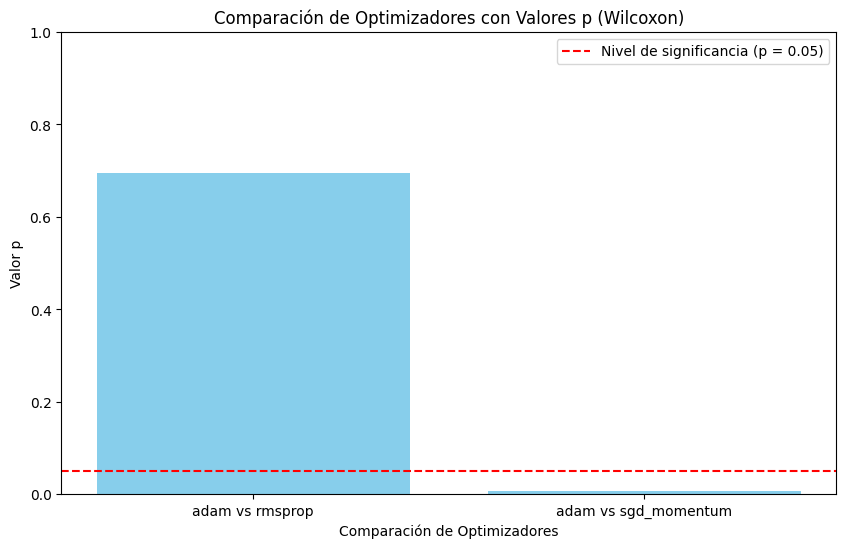

El mejor optimizador seleccionado es: sgd_momentum


In [ ]:
############################################
#
#   Generación de gráfica sobre Wilcoxon
#
############################################

comparisons = [f"{opt1} vs {opt2}" for (opt1, opt2) in wilcoxon_results.keys()]  # guardamos cada par de combinaciones de optimizadores
p_values = [p for p in wilcoxon_results.values()]                                # guardamos cada valor de p para cada par

plt.figure(figsize=(10, 6))
plt.bar(comparisons, p_values, color='skyblue')
plt.xlabel('Comparación de Optimizadores')
plt.ylabel('Valor p')
plt.title('Comparación de Optimizadores con Valores p (Wilcoxon)')
plt.axhline(y=0.05, color='r', linestyle='--', label='Nivel de significancia (p = 0.05)')
plt.legend()
plt.ylim(0, 1)
plt.show()

Uso de técnicas de aumentado de datos sencillas como ImageDataGenerator de
tf.Keras configurado convenientemente para equilibrar el número de muestras en la clase minoritaria

Pequeño ejemplo ilustrativo de las nuevas imágenes que se generan

Forma de las imágenes equilibradas: (8750, 32, 32, 3)
Distribución de clases: [4375 4375]


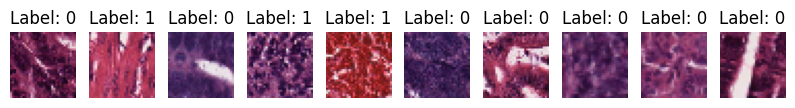

In [ ]:
##############################################################
#
#   Ilustración del aumentado de datos con ImageDataGenerator
#
##############################################################

generador_datos = ImageDataGenerator(
    rotation_range=15,                  # rotacion de (-15, +15) grados
    width_shift_range=0.15,             # desplazamiento horizontal de hasta 15%
    height_shift_range=0.15,            # desplazamiento vertical de hasta 15%
    horizontal_flip=True,               # voltear imagenes en horizontal
    fill_mode='reflect',                # rellenar pixeles con el reflejo de los cercanos
    shear_range=0.2,                    # distorsion del 20%
    zoom_range=[0.8, 1.2],              # zoom entre 80% y 120%
)

num_clases = np.bincount(y)                                   # obtenemos el numero de imagenes en las clases 0 y 1
imagenes_a_generar = num_clases[1] - num_clases[0]            # obtenemos cuantas tenemos que generar para equilibrar

X_clase_0 = X[y == 0]                                         # seleccionamos imagenes y etiquetas de clase 0
y_clase_0 = y[y == 0]

generador_clase_0 = generador_datos.flow(X_clase_0, y_clase_0, batch_size=1, shuffle=False)

nueva_X_clase_0 = []
nueva_y_clase_0 = []

for _ in range(imagenes_a_generar):
    img, label = next(generador_clase_0)
    nueva_X_clase_0.append(img[0])           # extraer la primera (y unica) imagen del batch
    nueva_y_clase_0.append(label[0])         # extraer la etiqueta correspondiente


nueva_X_clase_0 = np.array(nueva_X_clase_0)   # convertirlo a numpy array
nueva_y_clase_0 = np.array(nueva_y_clase_0)

nuevo_X = np.concatenate([X, nueva_X_clase_0], axis=0)    # concatenar las de inicio con las nuevas imagenes
nuevo_y = np.concatenate([y, nueva_y_clase_0], axis=0)

indices = np.arange(len(nuevo_X))    # barajar los indices
np.random.shuffle(indices)
nuevo_X = nuevo_X[indices]
nuevo_y = nuevo_y[indices]

print("Forma de las imágenes equilibradas:", nuevo_X.shape)
print("Distribución de clases:", np.bincount(nuevo_y))

show_images(nuevo_X, nuevo_y, num_images=10)


Función utilizada para generar nuevas imágenes

In [ ]:
##############################################
#
#   Aumentado de datos con ImageDataGenerator
#
##############################################

def generar_imagenes_clase_0(generador_datos, X, y):

  num_clases = np.bincount(y)                                   # obtenemos el numero de clases (0 o 1)
  imagenes_a_generar = num_clases[1] - num_clases[0]            # obtenemos cuantas tenemos que generar para equilibrar

  X_clase_0 = X[y == 0]                                         # seleccionamos imagenes y etiquetas de clase 0
  y_clase_0 = y[y == 0]

  generador_clase_0 = generador_datos.flow(X_clase_0, y_clase_0, batch_size=1, shuffle=False)

  nueva_X_clase_0 = []
  nueva_y_clase_0 = []

  for _ in range(imagenes_a_generar):
      img, label = next(generador_clase_0)
      nueva_X_clase_0.append(img[0])           # extraer la primera (y unica) imagen del batch
      nueva_y_clase_0.append(label[0])         # extraer la etiqueta correspondiente


  nueva_X_clase_0 = np.array(nueva_X_clase_0)   # convertirlo a numpy array
  nueva_y_clase_0 = np.array(nueva_y_clase_0)

  nuevo_X = np.concatenate([X, nueva_X_clase_0], axis=0)    # concatenar las de inicio con las nuevas imagenes
  nuevo_y = np.concatenate([y, nueva_y_clase_0], axis=0)

  indices = np.arange(len(nuevo_X))    # barajar los indices
  np.random.shuffle(indices)
  nuevo_X = nuevo_X[indices]
  nuevo_y = nuevo_y[indices]

  return nuevo_X, nuevo_y

In [ ]:
'''
generador_datos = ImageDataGenerator(
    rotation_range=15,                  # rotacion de (-15, +15) grados
    width_shift_range=0.15,             # desplazamiento horizontal de hasta 15%
    height_shift_range=0.15,            # desplazamiento vertical de hasta 15%
    horizontal_flip=True,               # voltear imagenes en horizontal
    fill_mode='reflect',                # rellenar pixeles con el reflejo de los cercanos
    shear_range=0.2,                    # distorsion del 20%
    zoom_range=[0.8, 1.2],              # zoom entre 80% y 120%
)

X_balanced, y_balanced = generar_imagenes_clase_0(generador_datos, X, y)

# Separar los conjuntos de entrenamiento y validación
X_train, X_val, y_train, y_val = train_test_split(X_balanced, y_balanced, test_size=0.1, random_state=42)

# Entrenar el modelo con el conjunto equilibrado
history = model.fit(
    generador_datos.flow(X_train, y_train, batch_size=32),
    steps_per_epoch=len(X_train) // 32,
    epochs=epochs,
    validation_data=(X_val, y_val)
)

# Predicciones para el conjunto de validación
y_pred_prob = model.predict(X_val).ravel()  # Obtener las probabilidades de la clase positiva
y_true = y_val  # Etiquetas verdaderas

# Calcular AUC
auc_score = roc_auc_score(y_true, y_pred_prob)
print(f"AUC en el conjunto de validación: {auc_score:.4f}")
'''

Epoch 1/25


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


246/246 ━━━━━━━━━━━━━━━━━━━━ 10s 35ms/step - accuracy: 0.9339 - loss: 0.1868 - val_accuracy: 0.9383 - val_loss: 0.1595
Epoch 2/25
246/246 ━━━━━━━━━━━━━━━━━━━━ 0s 417us/step - accuracy: 0.8750 - loss: 0.2945 - val_accuracy: 0.9097 - val_loss: 0.2394
Epoch 3/25


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


246/246 ━━━━━━━━━━━━━━━━━━━━ 6s 21ms/step - accuracy: 0.9408 - loss: 0.1635 - val_accuracy: 0.9177 - val_loss: 0.2028
Epoch 4/25
246/246 ━━━━━━━━━━━━━━━━━━━━ 0s 337us/step - accuracy: 0.9062 - loss: 0.1979 - val_accuracy: 0.9177 - val_loss: 0.2160
Epoch 5/25
246/246 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - accuracy: 0.9488 - loss: 0.1377 - val_accuracy: 0.5783 - val_loss: 1.4145
Epoch 6/25
246/246 ━━━━━━━━━━━━━━━━━━━━ 0s 399us/step - accuracy: 0.7500 - loss: 0.4532 - val_accuracy: 0.7577 - val_loss: 0.7588
Epoch 7/25
246/246 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - accuracy: 0.9404 - loss: 0.1563 - val_accuracy: 0.8994 - val_loss: 0.2710
Epoch 8/25
246/246 ━━━━━━━━━━━━━━━━━━━━ 0s 248us/step - accuracy: 0.9688 - loss: 0.0968 - val_accuracy: 0.8949 - val_loss: 0.2934
Epoch 9/25
246/246 ━━━━━━━━━━━━━━━━━━━━ 10s 20ms/step - accuracy: 0.9370 - loss: 0.1499 - val_accuracy: 0.9097 - val_loss: 0.2605
Epoch 10/25
246/246 ━━━━━━━━━━━━━━━━━━━━ 0s 339us/step - accuracy: 0.9688 - loss: 0.1150 - val_accuracy

Aplicación de las nuevas imágenes en 10-CV

In [ ]:
##############################################
#
#   Aplicación de 10-CV con ImageDataGenerator
#
##############################################

generador_datos = ImageDataGenerator(
    rotation_range=50,                  # rotacion de (-15, +15) grados
    width_shift_range=0.50,             # desplazamiento horizontal de hasta 15%
    height_shift_range=0.50,            # desplazamiento vertical de hasta 15%
    horizontal_flip=True,               # voltear imagenes en horizontal
    fill_mode='reflect',                # rellenar pixeles con el reflejo de los cercanos
    shear_range=0.25,                    # distorsion del 20%
    zoom_range=[0.5, 1.5],              # zoom entre 80% y 120%
)

sfk = StratifiedKFold(n_splits=10)
auc_scores = []

for train_idx, test_idx in sfk.split(X, y):
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    X_train, y_train = generar_imagenes_clase_0(generador_datos, X_train, y_train)

    X_train_final, X_val, y_train_final, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=24)

    model = create_model()
    history = model.fit(X_train_final, y_train_final,
                        steps_per_epoch=len(X_train_final) // 64,
                        epochs=epochs, batch_size=batch_size,
                        validation_data=(X_val, y_val))

    y_pred_prob = model.predict(X_test).ravel()
    auc_score = roc_auc_score(y_test, y_pred_prob)
    auc_scores.append(auc_score)

    print(f"AUC para este pliegue: {auc_score:.4f}")

print(f"AUC promedio en validación cruzada 10CV: {np.mean(auc_scores):.4f}")
print(f"Desviación estándar de AUC: {np.std(auc_scores):.4f}")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/25
110/110 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6992 - loss: 0.5292 - val_accuracy: 0.8693 - val_loss: 0.3133
Epoch 2/25
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 443us/step - accuracy: 0.8478 - loss: 0.3288 - val_accuracy: 0.7754 - val_loss: 0.4505
Epoch 3/25


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8712 - loss: 0.2993 - val_accuracy: 0.9264 - val_loss: 0.1794
Epoch 4/25
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 399us/step - accuracy: 0.8913 - loss: 0.2315 - val_accuracy: 0.8046 - val_loss: 0.4511
Epoch 5/25
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8753 - loss: 0.2992 - val_accuracy: 0.9353 - val_loss: 0.1602
Epoch 6/25
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 392us/step - accuracy: 0.9565 - loss: 0.1829 - val_accuracy: 0.9340 - val_loss: 0.1553
Epoch 7/25
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9225 - loss: 0.1822 - val_accuracy: 0.9404 - val_loss: 0.1386
Epoch 8/25
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 376us/step - accuracy: 0.9565 - loss: 0.1415 - val_accuracy: 0.9404 - val_loss: 0.1361
Epoch 9/25
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9420 - loss: 0.1574 - val_accuracy: 0.9201 - val_loss: 0.1892
Epoch 10/25
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 381us/step - accuracy: 0.9783 - loss: 0.0638 - val_accuracy: 0.94

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/25
110/110 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.6705 - loss: 0.5560 - val_accuracy: 0.8832 - val_loss: 0.3118
Epoch 2/25
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 434us/step - accuracy: 0.8913 - loss: 0.2661 - val_accuracy: 0.8845 - val_loss: 0.3094
Epoch 3/25


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8784 - loss: 0.2908 - val_accuracy: 0.9251 - val_loss: 0.1962
Epoch 4/25
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 427us/step - accuracy: 0.9565 - loss: 0.1527 - val_accuracy: 0.9239 - val_loss: 0.1942
Epoch 5/25
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9059 - loss: 0.2271 - val_accuracy: 0.8985 - val_loss: 0.2813
Epoch 6/25
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 409us/step - accuracy: 0.9130 - loss: 0.2462 - val_accuracy: 0.9023 - val_loss: 0.2735
Epoch 7/25
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9085 - loss: 0.2233 - val_accuracy: 0.9365 - val_loss: 0.1661
Epoch 8/25
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 401us/step - accuracy: 0.9348 - loss: 0.2423 - val_accuracy: 0.9454 - val_loss: 0.1539
Epoch 9/25
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9310 - loss: 0.1749 - val_accuracy: 0.9404 - val_loss: 0.1519
Epoch 10/25
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 404us/step - accuracy: 0.9565 - loss: 0.1141 - val_accuracy: 0.94

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/25
110/110 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6871 - loss: 0.5249 - val_accuracy: 0.7183 - val_loss: 0.6213
Epoch 2/25
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 462us/step - accuracy: 0.6957 - loss: 0.6120 - val_accuracy: 0.8388 - val_loss: 0.3516
Epoch 3/25
 43/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7623 - loss: 0.4844

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8040 - loss: 0.4235 - val_accuracy: 0.9162 - val_loss: 0.2344
Epoch 4/25
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 799us/step - accuracy: 0.9565 - loss: 0.1399 - val_accuracy: 0.9074 - val_loss: 0.2562
Epoch 5/25
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9108 - loss: 0.2218 - val_accuracy: 0.9277 - val_loss: 0.1925
Epoch 6/25
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 808us/step - accuracy: 0.9565 - loss: 0.1738 - val_accuracy: 0.9340 - val_loss: 0.1861
Epoch 7/25
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9363 - loss: 0.1689 - val_accuracy: 0.9505 - val_loss: 0.1478
Epoch 8/25
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 454us/step - accuracy: 0.9130 - loss: 0.1756 - val_accuracy: 0.9480 - val_loss: 0.1457
Epoch 9/25
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9435 - loss: 0.1536 - val_accuracy: 0.9404 - val_loss: 0.1584
Epoch 10/25
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 488us/step - accuracy: 0.9348 - loss: 0.2077 - val_accuracy: 0.95

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/25
110/110 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.6996 - loss: 0.5143 - val_accuracy: 0.8934 - val_loss: 0.2452
Epoch 2/25
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 467us/step - accuracy: 0.9130 - loss: 0.2736 - val_accuracy: 0.8566 - val_loss: 0.3228
Epoch 3/25
 43/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8742 - loss: 0.2729

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8751 - loss: 0.2860 - val_accuracy: 0.9112 - val_loss: 0.2282
Epoch 4/25
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 827us/step - accuracy: 0.8913 - loss: 0.2540 - val_accuracy: 0.9086 - val_loss: 0.2355
Epoch 5/25
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9113 - loss: 0.2207 - val_accuracy: 0.9213 - val_loss: 0.1802
Epoch 6/25
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 793us/step - accuracy: 0.8913 - loss: 0.2625 - val_accuracy: 0.8832 - val_loss: 0.2802
Epoch 7/25
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9173 - loss: 0.2096 - val_accuracy: 0.9264 - val_loss: 0.1878
Epoch 8/25
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 429us/step - accuracy: 0.9565 - loss: 0.1727 - val_accuracy: 0.8769 - val_loss: 0.2592
Epoch 9/25
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9399 - loss: 0.1564 - val_accuracy: 0.9315 - val_loss: 0.1610
Epoch 10/25
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 402us/step - accuracy: 0.9130 - loss: 0.1505 - val_accuracy: 0.93

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/25
110/110 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.6880 - loss: 0.5220 - val_accuracy: 0.8845 - val_loss: 0.2745
Epoch 2/25
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 459us/step - accuracy: 0.8261 - loss: 0.2446 - val_accuracy: 0.8972 - val_loss: 0.2655
Epoch 3/25


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8747 - loss: 0.2943 - val_accuracy: 0.9124 - val_loss: 0.2085
Epoch 4/25
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 494us/step - accuracy: 0.9130 - loss: 0.2302 - val_accuracy: 0.8731 - val_loss: 0.2917
Epoch 5/25
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8929 - loss: 0.2641 - val_accuracy: 0.9327 - val_loss: 0.1863
Epoch 6/25
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 395us/step - accuracy: 0.9565 - loss: 0.1270 - val_accuracy: 0.9239 - val_loss: 0.1906
Epoch 7/25
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9372 - loss: 0.1661 - val_accuracy: 0.9442 - val_loss: 0.1437
Epoch 8/25
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 496us/step - accuracy: 0.9783 - loss: 0.0642 - val_accuracy: 0.9353 - val_loss: 0.1524
Epoch 9/25
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9324 - loss: 0.1693 - val_accuracy: 0.9353 - val_loss: 0.1751
Epoch 10/25
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 471us/step - accuracy: 0.9348 - loss: 0.1615 - val_accuracy: 0.94

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/25
110/110 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.7032 - loss: 0.5243 - val_accuracy: 0.8160 - val_loss: 0.3714
Epoch 2/25
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 791us/step - accuracy: 0.7917 - loss: 0.4030 - val_accuracy: 0.8096 - val_loss: 0.3809
Epoch 3/25
 22/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8637 - loss: 0.3242 

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8752 - loss: 0.3015 - val_accuracy: 0.8756 - val_loss: 0.2964
Epoch 4/25
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 403us/step - accuracy: 0.8750 - loss: 0.4442 - val_accuracy: 0.9188 - val_loss: 0.1976
Epoch 5/25
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8854 - loss: 0.2606 - val_accuracy: 0.9302 - val_loss: 0.1777
Epoch 6/25
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 462us/step - accuracy: 0.9792 - loss: 0.1211 - val_accuracy: 0.8947 - val_loss: 0.2365
Epoch 7/25
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9193 - loss: 0.1938 - val_accuracy: 0.9480 - val_loss: 0.2145
Epoch 8/25
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 385us/step - accuracy: 0.8750 - loss: 0.3076 - val_accuracy: 0.9492 - val_loss: 0.2110
Epoch 9/25
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9337 - loss: 0.1774 - val_accuracy: 0.9112 - val_loss: 0.1937
Epoch 10/25
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 781us/step - accuracy: 0.8750 - loss: 0.3378 - val_accuracy: 0.95

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/25
110/110 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.7109 - loss: 0.5039 - val_accuracy: 0.8338 - val_loss: 0.3862
Epoch 2/25
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 835us/step - accuracy: 0.8125 - loss: 0.3868 - val_accuracy: 0.8642 - val_loss: 0.3579
Epoch 3/25
 22/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8600 - loss: 0.3320 

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8714 - loss: 0.3076 - val_accuracy: 0.9213 - val_loss: 0.1911
Epoch 4/25
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 397us/step - accuracy: 0.8542 - loss: 0.2476 - val_accuracy: 0.9239 - val_loss: 0.1883
Epoch 5/25
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9235 - loss: 0.1972 - val_accuracy: 0.8985 - val_loss: 0.2355
Epoch 6/25
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 526us/step - accuracy: 0.8333 - loss: 0.3172 - val_accuracy: 0.9175 - val_loss: 0.1919
Epoch 7/25
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9319 - loss: 0.1721 - val_accuracy: 0.9226 - val_loss: 0.1755
Epoch 8/25
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 419us/step - accuracy: 0.8750 - loss: 0.3733 - val_accuracy: 0.9251 - val_loss: 0.1747
Epoch 9/25
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9290 - loss: 0.1822 - val_accuracy: 0.9112 - val_loss: 0.2388
Epoch 10/25
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 757us/step - accuracy: 0.8542 - loss: 0.2844 - val_accuracy: 0.91

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/25
110/110 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.6881 - loss: 0.5273 - val_accuracy: 0.8084 - val_loss: 0.4113
Epoch 2/25
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 796us/step - accuracy: 0.7500 - loss: 0.4525 - val_accuracy: 0.8388 - val_loss: 0.3837
Epoch 3/25
 21/110 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8657 - loss: 0.3482 

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8754 - loss: 0.3137 - val_accuracy: 0.8845 - val_loss: 0.2442
Epoch 4/25
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 415us/step - accuracy: 0.8958 - loss: 0.1667 - val_accuracy: 0.9327 - val_loss: 0.1946
Epoch 5/25
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8944 - loss: 0.2422 - val_accuracy: 0.9302 - val_loss: 0.1837
Epoch 6/25
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 506us/step - accuracy: 0.9375 - loss: 0.1539 - val_accuracy: 0.9353 - val_loss: 0.1794
Epoch 7/25
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9217 - loss: 0.1947 - val_accuracy: 0.9226 - val_loss: 0.1626
Epoch 8/25
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 414us/step - accuracy: 0.8958 - loss: 0.2594 - val_accuracy: 0.9137 - val_loss: 0.1692
Epoch 9/25
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9369 - loss: 0.1638 - val_accuracy: 0.9239 - val_loss: 0.1678
Epoch 10/25
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 424us/step - accuracy: 0.9792 - loss: 0.0716 - val_accuracy: 0.91

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/25
110/110 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.6845 - loss: 0.5377 - val_accuracy: 0.8401 - val_loss: 0.3818
Epoch 2/25
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 433us/step - accuracy: 0.8750 - loss: 0.2936 - val_accuracy: 0.8363 - val_loss: 0.3724
Epoch 3/25


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8808 - loss: 0.2925 - val_accuracy: 0.8972 - val_loss: 0.2951
Epoch 4/25
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 417us/step - accuracy: 0.8750 - loss: 0.2939 - val_accuracy: 0.8414 - val_loss: 0.3350
Epoch 5/25
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8879 - loss: 0.2760 - val_accuracy: 0.8794 - val_loss: 0.2832
Epoch 6/25
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 443us/step - accuracy: 0.8750 - loss: 0.2674 - val_accuracy: 0.9048 - val_loss: 0.2370
Epoch 7/25
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9324 - loss: 0.1808 - val_accuracy: 0.8782 - val_loss: 0.2802
Epoch 8/25
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 407us/step - accuracy: 0.9167 - loss: 0.2267 - val_accuracy: 0.8909 - val_loss: 0.2534
Epoch 9/25
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9395 - loss: 0.1586 - val_accuracy: 0.9404 - val_loss: 0.1632
Epoch 10/25
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 478us/step - accuracy: 0.9583 - loss: 0.1080 - val_accuracy: 0.93

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/25
110/110 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.6871 - loss: 0.5336 - val_accuracy: 0.8896 - val_loss: 0.2759
Epoch 2/25
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 461us/step - accuracy: 0.8333 - loss: 0.4074 - val_accuracy: 0.8299 - val_loss: 0.3334
Epoch 3/25
 40/110 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8382 - loss: 0.3508

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8674 - loss: 0.3013 - val_accuracy: 0.8972 - val_loss: 0.2804
Epoch 4/25
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 775us/step - accuracy: 0.8750 - loss: 0.3262 - val_accuracy: 0.9302 - val_loss: 0.2408
Epoch 5/25
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9058 - loss: 0.2338 - val_accuracy: 0.9442 - val_loss: 0.1786
Epoch 6/25
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 403us/step - accuracy: 0.9375 - loss: 0.1594 - val_accuracy: 0.9226 - val_loss: 0.2058
Epoch 7/25
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9242 - loss: 0.1914 - val_accuracy: 0.9569 - val_loss: 0.1395
Epoch 8/25
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 761us/step - accuracy: 0.9375 - loss: 0.1232 - val_accuracy: 0.9556 - val_loss: 0.1371
Epoch 9/25
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9335 - loss: 0.1711 - val_accuracy: 0.9569 - val_loss: 0.1235
Epoch 10/25
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 603us/step - accuracy: 0.9583 - loss: 0.1681 - val_accuracy: 0.94

Generación de gráfica comparativa de distintos filtros de ImageDataGenerator

In [ ]:
generador_1 = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    fill_mode='reflect',
    shear_range=0.1,
    zoom_range=[0.9, 1.1]
)

generador_2 = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    shear_range=0.15,
    zoom_range=[0.8, 1.2]
)

generador_3 = ImageDataGenerator(
    rotation_range=5,
    width_shift_range=0.05,
    height_shift_range=0.05,
    horizontal_flip=False,
    fill_mode='constant',
    shear_range=0,
    zoom_range=[0.95, 1.05]
)

generadores = [generador_1, generador_2, generador_3]
generador_nombres = ['Generador 1', 'Generador 2', 'Generador 3']

sfk = StratifiedKFold(n_splits=10)
resultados_auc = []

for i, generador in enumerate(generadores):
    auc_scores = []
    print(f"\nEvaluando {generador_nombres[i]}:")

    for train_idx, test_idx in sfk.split(X, y):
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]

        # Generar datos balanceados para este pliegue
        X_train_balanced, y_train_balanced = generar_imagenes_clase_0(generador, X_train, y_train)

        # Entrenamiento y validación
        model = create_model()
        model.fit(
            X_train_balanced, y_train_balanced,
            epochs=epochs,
            validation_data=(X_test, y_test),
            verbose=0  # Suprime detalles del entrenamiento
        )

        # Calcular AUC para el conjunto de prueba
        y_pred_prob = model.predict(X_test).ravel()
        auc_score = roc_auc_score(y_test, y_pred_prob)
        auc_scores.append(auc_score)
        print(f"AUC en este pliegue: {auc_score:.4f}")

    # Guardar los resultados de AUC promedio para este generador
    resultados_auc.append(auc_scores)
    print(f"AUC promedio para {generador_nombres[i]}: {np.mean(auc_scores):.4f}")


Evaluando Generador 1:


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
AUC en este pliegue: 0.9548


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
AUC en este pliegue: 0.9748


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
AUC en este pliegue: 0.9513


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
AUC en este pliegue: 0.9736


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
AUC en este pliegue: 0.9557


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
AUC en este pliegue: 0.9650


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
AUC en este pliegue: 0.9810


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
AUC en este pliegue: 0.9725


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
AUC en este pliegue: 0.9749


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
AUC en este pliegue: 0.9667
AUC promedio para Generador 1: 0.9670

Evaluando Generador 2:


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
AUC en este pliegue: 0.9583


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
AUC en este pliegue: 0.9550


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
AUC en este pliegue: 0.9625


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
AUC en este pliegue: 0.9662


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
AUC en este pliegue: 0.9554


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
AUC en este pliegue: 0.9554


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
AUC en este pliegue: 0.9755


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
AUC en este pliegue: 0.9665


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
AUC en este pliegue: 0.9708


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
AUC en este pliegue: 0.9613
AUC promedio para Generador 2: 0.9627

Evaluando Generador 3:


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
AUC en este pliegue: 0.9588


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
AUC en este pliegue: 0.9650


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
AUC en este pliegue: 0.9699


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
AUC en este pliegue: 0.9782


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
AUC en este pliegue: 0.9712


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
AUC en este pliegue: 0.9794


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
AUC en este pliegue: 0.9852


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
AUC en este pliegue: 0.9696


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
AUC en este pliegue: 0.9680


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
AUC en este pliegue: 0.9436
AUC promedio para Generador 3: 0.9689


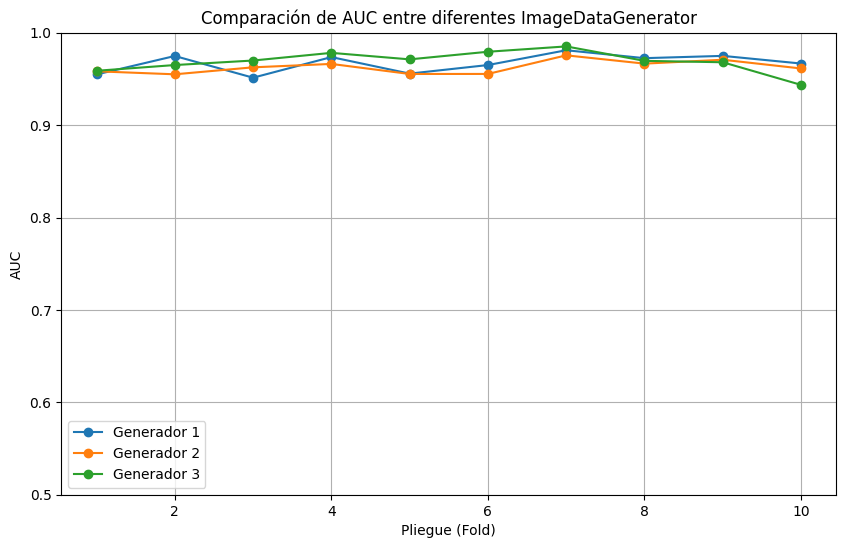

In [ ]:
plt.figure(figsize=(10, 6))
for i, auc_scores in enumerate(resultados_auc):
    plt.plot(range(1, 11), auc_scores, marker='o', label=generador_nombres[i])

plt.title('Comparación de AUC entre diferentes ImageDataGenerator')
plt.xlabel('Pliegue (Fold)')
plt.ylabel('AUC')
plt.ylim(0.5, 1.0)
plt.legend()
plt.grid(True)
plt.show()

## **Intermedio**

Clasificación con todas las categorías (0..7)

In [ ]:
###################################
#
#    Multiclase
#
###################################

nb_classes = 8
batch_size = 32
epochs = 50

X, y = load_data()

Creamos un modelo multiclase

In [ ]:
####################################
#
#   Creación del modelo multiclase
#
####################################

def create_model_multiclass(optimizer='adam'):
    if optimizer == 'adam':
        optimizer_usado = Adam()
    elif optimizer == 'sgd':
        optimizer_usado = SGD()
    elif optimizer == 'sgd_momentum':
        optimizer_usado = SGD(momentum=0.9)
    elif optimizer == 'rmsprop':
        optimizer_usado = RMSprop()
    else:
        raise ValueError("Optimizer no soportado. Por favor, elige entre 'adam', 'sgd', 'sgd_momentum' o 'rmsprop'.")

    model = Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_rows, img_cols, 3)),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(64, activation='relu'),
        layers.Dropout(0.5),                              # regularización
        layers.Dense(nb_classes, activation='softmax')    # 8 neuronas de salida
    ])
    model.compile(optimizer=optimizer_usado, loss='sparse_categorical_crossentropy', metrics=['accuracy'])  # cambia la perdida a sparse_categorical_crossentropy al ser multiclase

    return model


Entrenamos el modelo para las 8 categorías

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


125/125 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - accuracy: 0.2497 - loss: 1.8184 - val_accuracy: 0.5360 - val_loss: 1.1120
Epoch 2/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5044 - loss: 1.1893 - val_accuracy: 0.6490 - val_loss: 0.8489
Epoch 3/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5688 - loss: 1.0089 - val_accuracy: 0.6920 - val_loss: 0.8092
Epoch 4/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6411 - loss: 0.9015 - val_accuracy: 0.7020 - val_loss: 0.7644
Epoch 5/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6763 - loss: 0.8420 - val_accuracy: 0.7570 - val_loss: 0.6262
Epoch 6/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6944 - loss: 0.7774 - val_accuracy: 0.7490 - val_loss: 0.6412
Epoch 7/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7083 - loss: 0.7575 - val_accuracy: 0.7600 - val_loss: 0.6142
Epoch 8/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7349 - loss: 0.6911 - val_accuracy: 0.7810 - val

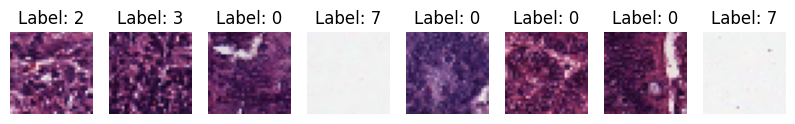

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step
AUC (macro promedio): 0.9778


In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=24)

model = create_model_multiclass()
history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_val, y_val))

y_pred_multiclass = model.predict(X_val)

y_val_one_hot = tf.keras.utils.to_categorical(y_val, num_classes=nb_classes)    # y_val pasa a una matriz binaria

auc_score = roc_auc_score(y_val_one_hot, y_pred_multiclass, average='macro', multi_class='ovr')  # calculo de AUC

print(f'AUC (macro promedio): {auc_score:.4f}')

Dado que ahora el número de ejemplos por categoría estará equilibrado
estudiaremos las métricas AUC y F1

Gráfica con las distintas clases y cantidad de imágenes en cada una

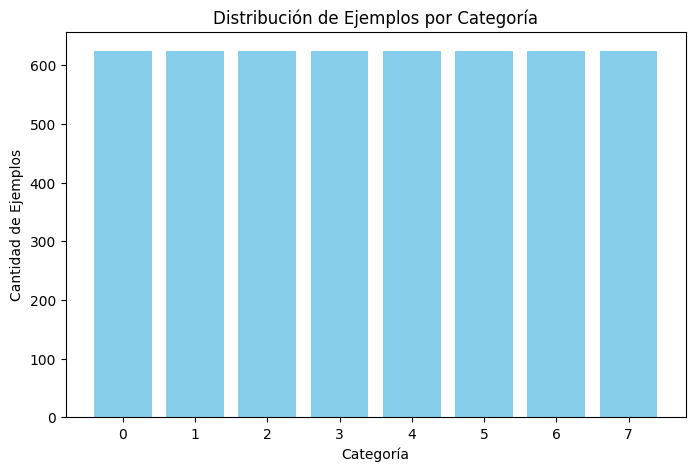

In [ ]:
# Obtener las clases únicas y la cantidad de ejemplos por clase
unique_classes, counts_per_class = np.unique(y, return_counts=True)

# Graficar la cantidad de ejemplos por clase
plt.figure(figsize=(8, 5))
plt.bar(unique_classes, counts_per_class, color='skyblue')
plt.xlabel('Categoría')
plt.ylabel('Cantidad de Ejemplos')
plt.title('Distribución de Ejemplos por Categoría')
plt.xticks(unique_classes)
plt.show()

Entrenamiento del modelo para calcular AUC y F1

In [ ]:
optimizadores = ['adam', 'sgd', 'sgd_momentum', 'rmsprop']
resultados = {}

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=24)

for optimizador in optimizadores:
    print(f"Entrenando con optimizador: {optimizador}")
    model = create_model_multiclass(optimizador)
    model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_val, y_val), verbose=0)

    y_pred_multiclass = model.predict(X_val)
    y_pred = np.argmax(y_pred_multiclass, axis=1)

    y_val_one_hot = tf.keras.utils.to_categorical(y_val, num_classes=8)

    auc_score = roc_auc_score(y_val_one_hot, y_pred_multiclass, average='macro', multi_class='ovr')
    f1 = f1_score(y_val, y_pred, average='macro')

    resultados[optimizador] = {
        "AUC": auc_score,
        "F1": f1
    }


for optimizador, metricas in resultados.items():
    print(f"Optimizador: {optimizador}")
    print(f"  AUC: {metricas['AUC']:.4f}")
    print(f"  F1 Score: {metricas['F1']:.4f}\n")


Entrenando con optimizador: adam


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step
Entrenando con optimizador: sgd


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
Entrenando con optimizador: sgd_momentum


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
Entrenando con optimizador: rmsprop


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Optimizador: adam
  AUC: 0.9759
  F1 Score: 0.8069

Optimizador: sgd
  AUC: 0.9689
  F1 Score: 0.6203

Optimizador: sgd_momentum
  AUC: 0.9624
  F1 Score: 0.7686

Optimizador: rmsprop
  AUC: 0.9748
  F1 Score: 0.8181



Gráfica comparativa de los distintos optimizadores en multiclase

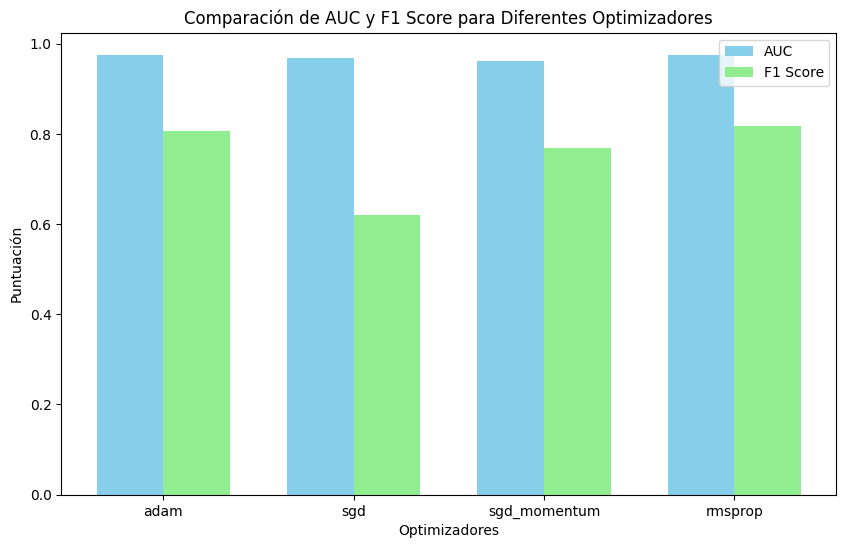

In [ ]:
labels = list(resultados.keys())
auc_values = [metricas['AUC'] for metricas in resultados.values()]
f1_values = [metricas['F1'] for metricas in resultados.values()]

x = np.arange(len(labels))  # posiciones de los grupos
width = 0.35  # ancho de las barras

fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - width/2, auc_values, width, label='AUC', color='skyblue')
bars2 = ax.bar(x + width/2, f1_values, width, label='F1 Score', color='lightgreen')

# titulos y labels de los ejes
ax.set_xlabel('Optimizadores')
ax.set_ylabel('Puntuación')
ax.set_title('Comparación de AUC y F1 Score para Diferentes Optimizadores')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

Ajustes combinados (adición de capas, parámetros de convolución y escalado de imágenes)

Reescalado de las imágenes del dataset

In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
from sklearn.model_selection import train_test_split

Shape de X: (5000, 16, 16, 3)


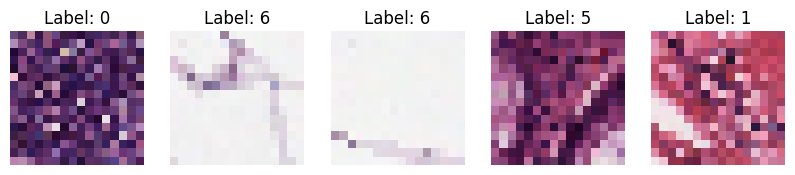

In [ ]:
########################################
#
#   Cargar datos (nuevo tamaño imagen)
#
########################################

def load_data_resized(name="colorectal_histology"):           # misma manera de cargar los datos pero reescalando las imagenes
    train_ds = tfds.load(name, split=tfds.Split.TRAIN, batch_size=-1)
    train_ds['image'] = tf.map_fn(lambda x: tf.cast(x, tf.float32) / 255.0, train_ds['image'], dtype=tf.float32)
    train_ds['image'] = tf.image.resize(train_ds['image'], (16, 16))    # 16x16 pixeles cada imagen
    numpy_ds = tfds.as_numpy(train_ds)
    X, y = numpy_ds['image'], numpy_ds['label']
    return np.array(X), np.array(y)

X, y = load_data_resized()

print(f"Shape de X: {X.shape}")

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=24)

show_images(X_train, y_train, num_images=5)


Nuevo modelo para probar varias configuraciones

In [ ]:
################################################
#
#   Modelo para probar distintas configuraciones
#
#################################################

def create_model_n_layers_n_filters(n_layers, n_filters, size=16):
    model = tf.keras.Sequential()

    for i in range(n_layers):     #  añadir n_layers capas al modelo
        if i == 0:
            model.add(tf.keras.layers.Conv2D(n_filters, (3, 3), activation='relu', input_shape=(size, size, 3)))  # primera capa convolucional indica el tamaño de las imagenes y los canales
        else:
            model.add(tf.keras.layers.Conv2D(n_filters, (3, 3), activation='relu'))

        if i > 0 and i % 3 == 0:
            model.add(tf.keras.layers.MaxPooling2D((2, 2), strides=(2, 2), padding='same'))   # reducir dimensiones cada 3 capas

    model.add(tf.keras.layers.GlobalAveragePooling2D())     # evitamos flatten y usamos globalaveragepooling2d para evitar dimensiones muy reducidas

    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(128, activation='relu'))
    model.add(tf.keras.layers.Dense(64, activation='relu'))
    model.add(tf.keras.layers.Dropout(0.5))
    model.add(tf.keras.layers.Dense(8, activation='softmax'))   # por ser multiclase se usa softmax

    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    return model

Poner a prueba los distintos parámetros

In [ ]:
################################################
#
#   Prueba del modelo con distintos parámetros
#
#################################################


layers_list = [1, 3, 5]
filters_list = [16, 32, 64, 128]
resultados = {}

for layer in layers_list:
    for filter in filters_list:
        print(f"Entrenando con {layer} capas y {filter} filtros por capa")

        model = None
        model = create_model_n_layers_n_filters(layer, filter, size=16)
        model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_val, y_val), verbose=0)

        y_pred_multiclass = model.predict(X_val)
        y_pred = np.argmax(y_pred_multiclass, axis=1)

        y_val_one_hot = tf.keras.utils.to_categorical(y_val, num_classes=8)
        auc_score = roc_auc_score(y_val_one_hot, y_pred_multiclass, average='macro', multi_class='ovr')
        f1 = f1_score(y_val, y_pred, average='macro')

        key = str(layer) + "," + str(filter)
        resultados[key] = {
            "AUC": auc_score,
            "F1": f1
        }
        print(f"Valor de AUC: {auc_score} y F1: {f1} para capa {layer} y filtros {filter}")

Entrenando con 1 capas y 16 filtros por capa


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
Valor de AUC: 0.9609856903970709 y F1: 0.7249788826964307 para capa 1 y filtros 16
Entrenando con 1 capas y 32 filtros por capa


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
Valor de AUC: 0.9596050145167441 y F1: 0.6693808489651549 para capa 1 y filtros 32
Entrenando con 1 capas y 64 filtros por capa


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
Valor de AUC: 0.9679392787535621 y F1: 0.721500519818413 para capa 1 y filtros 64
Entrenando con 1 capas y 128 filtros por capa


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
Valor de AUC: 0.9730756575368765 y F1: 0.7561138355633685 para capa 1 y filtros 128
Entrenando con 3 capas y 16 filtros por capa


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
Valor de AUC: 0.9719032749328507 y F1: 0.7548388682185455 para capa 3 y filtros 16
Entrenando con 3 capas y 32 filtros por capa


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step
Valor de AUC: 0.9786240561136779 y F1: 0.8111984139332713 para capa 3 y filtros 32
Entrenando con 3 capas y 64 filtros por capa


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
Valor de AUC: 0.9806835920893386 y F1: 0.8146304988395405 para capa 3 y filtros 64
Entrenando con 3 capas y 128 filtros por capa


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
Valor de AUC: 0.9833393226750051 y F1: 0.8235508313041463 para capa 3 y filtros 128
Entrenando con 5 capas y 16 filtros por capa


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Valor de AUC: 0.9712087349002083 y F1: 0.781024459998782 para capa 5 y filtros 16
Entrenando con 5 capas y 32 filtros por capa


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Valor de AUC: 0.97692625419709 y F1: 0.7949081157317891 para capa 5 y filtros 32
Entrenando con 5 capas y 64 filtros por capa


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step
Valor de AUC: 0.9741279851384271 y F1: 0.7939705059274542 para capa 5 y filtros 64
Entrenando con 5 capas y 128 filtros por capa


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step
Valor de AUC: 0.9753240847553141 y F1: 0.8060372723721592 para capa 5 y filtros 128


Gráficas comparativas con distintos parámetros

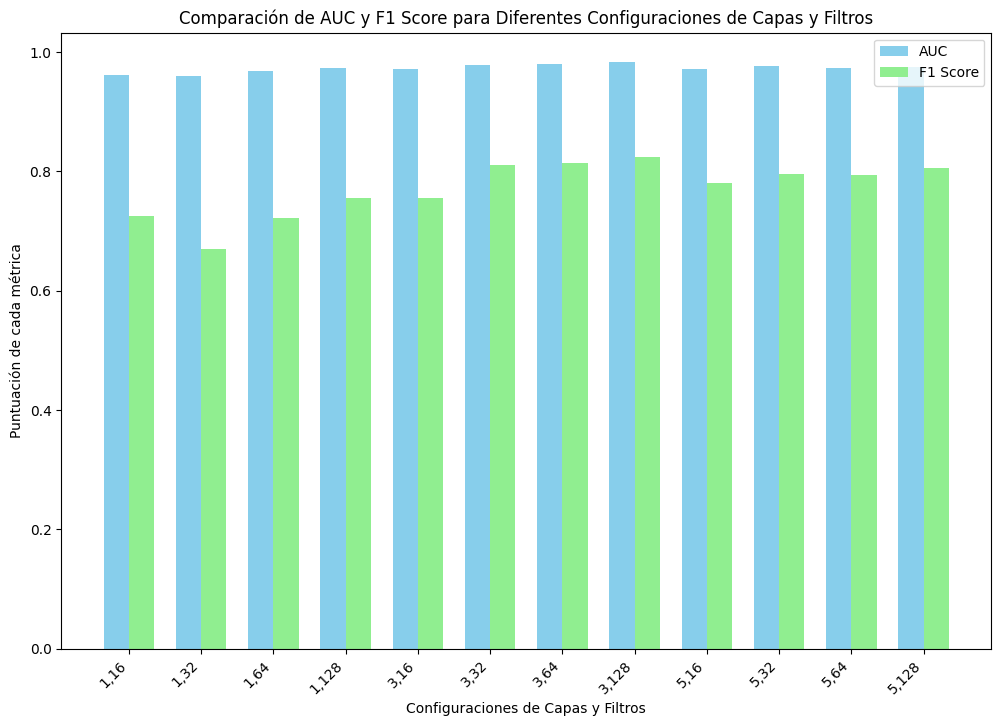

In [ ]:
################################################
#
#   Gráficas comparativas
#
#################################################


labels = list(resultados.keys())
auc_values = [metrics['AUC'] for metrics in resultados.values()]
f1_values = [metrics['F1'] for metrics in resultados.values()]

x = np.arange(len(labels))  # posiciones de los grupos
width = 0.35  # ancho de las barras

fig, ax = plt.subplots(figsize=(12, 8))
bars1 = ax.bar(x - width/2, auc_values, width, label='AUC', color='skyblue')
bars2 = ax.bar(x + width/2, f1_values, width, label='F1 Score', color='lightgreen')

ax.set_xlabel('Configuraciones de Capas y Filtros')
ax.set_ylabel('Puntuación de cada métrica')
ax.set_title('Comparación de AUC y F1 Score para Diferentes Configuraciones de Capas y Filtros')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45, ha='right')
ax.legend()

Ajuste del algoritmo de optimización (mejores resultados con menos épocas con algoritmos externos NO implementados en tf.keras)

Instalación de tensorflow-addons junto a tensorflow compatible

In [ ]:
!pip install tensorflow==2.12.0
!pip uninstall tensorflow-addons -y
!pip install tensorflow-addons --upgrade


Found existing installation: tensorflow-addons 0.23.0
Uninstalling tensorflow-addons-0.23.0:
  Successfully uninstalled tensorflow-addons-0.23.0
  Using cached tensorflow_addons-0.23.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (1.8 kB)
Using cached tensorflow_addons-0.23.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (611 kB)


Cargar la librería

In [ ]:
import tensorflow_addons as tfa
from tensorflow_addons.optimizers import Lookahead
import tensorflow as tf
import tensorflow_datasets as tfds
from sklearn.metrics import roc_auc_score, f1_score
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, f1_score

Cargar los datos

In [ ]:
X, y = load_data_resized()

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=24)

Utilizar el optimizador Ranger de tensorflow_addons

In [ ]:
######################################
#
#   Pruebas con optimizador Ranger
#
######################################

radam_optimizer = tfa.optimizers.RectifiedAdam(learning_rate=0.001)
ranger_optimizer = Lookahead(radam_optimizer, sync_period=5)  # lookahead se aplica sobre RAdam

model = create_model_n_layers_n_filters(3, 32, size=16)
model.compile(optimizer=ranger_optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=15, batch_size=batch_size, validation_data=(X_val, y_val), verbose=0)

y_pred_multiclass = model.predict(X_val)
y_pred = np.argmax(y_pred_multiclass, axis=1)
y_val_one_hot = tf.keras.utils.to_categorical(y_val, num_classes=8)

auc_score_ranger = roc_auc_score(y_val_one_hot, y_pred_multiclass, average='macro', multi_class='ovr')
f1_ranger = f1_score(y_val, y_pred, average='macro')

print(f"AUC (macro promedio usando Ranger): {auc_score_ranger:.4f}")
print(f"F1 Score (macro promedio usando Ranger): {f1_ranger:.4f}")

32/32 [==============================] - 0s 10ms/step
AUC (macro promedio usando Ranger): 0.9484
F1 Score (macro promedio usando Ranger): 0.6817


Uso del optimizador AdaBelief

In [ ]:
from tensorflow_addons.optimizers import AdaBelief
from tensorflow_addons.optimizers import LAMB

In [ ]:
######################################
#
#   Pruebas con optimizador AdaBelief
#
######################################

adabelief_optimizer = AdaBelief(learning_rate=0.001)

model = create_model_n_layers_n_filters(3, 32, size=16)
model.compile(optimizer=adabelief_optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=15, validation_data=(X_val, y_val), batch_size=batch_size, verbose=0)

y_pred_multiclass = model.predict(X_val)
y_pred = np.argmax(y_pred_multiclass, axis=1)
y_val_one_hot = tf.keras.utils.to_categorical(y_val, num_classes=8)

auc_score_adabelief = roc_auc_score(y_val_one_hot, y_pred_multiclass, average='macro', multi_class='ovr')
f1_adabelief = f1_score(y_val, y_pred, average='macro')

print(f"AUC (macro promedio usando AdaBelief): {auc_score_adabelief:.4f}")
print(f"F1 Score (macro promedio usando AdaBelief): {f1_adabelief:.4f}")

32/32 [==============================] - 0s 10ms/step
AUC (macro promedio usando Ranger): 0.9573
F1 Score (macro promedio usando Ranger): 0.7164


Uso del optimizador LAMB

In [ ]:
###################################
#
#   Pruebas con optimizador LAMB
#
###################################

lamb_optimizer = tfa.optimizers.LAMB(learning_rate=0.001)

model = create_model_n_layers_n_filters(3, 32, size=16)
model.compile(optimizer=lamb_optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=15, validation_data=(X_val, y_val), batch_size=batch_size, verbose=0)

y_pred_multiclass = model.predict(X_val)
y_pred = np.argmax(y_pred_multiclass, axis=1)
y_val_one_hot = tf.keras.utils.to_categorical(y_val, num_classes=8)

auc_score_lamb = roc_auc_score(y_val_one_hot, y_pred_multiclass, average='macro', multi_class='ovr')
f1_lamb = f1_score(y_val, y_pred, average='macro')

print(f"AUC (macro promedio usando LAMB): {auc_score_lamb:.4f}")
print(f"F1 Score (macro promedio usando LAMB): {f1_lamb:.4f}")

32/32 [==============================] - 0s 9ms/step
AUC (macro promedio usando LAMB): 0.9464
F1 Score (macro promedio usando LAMB): 0.6570


Gráfica comparativa de los distintos optimizadores

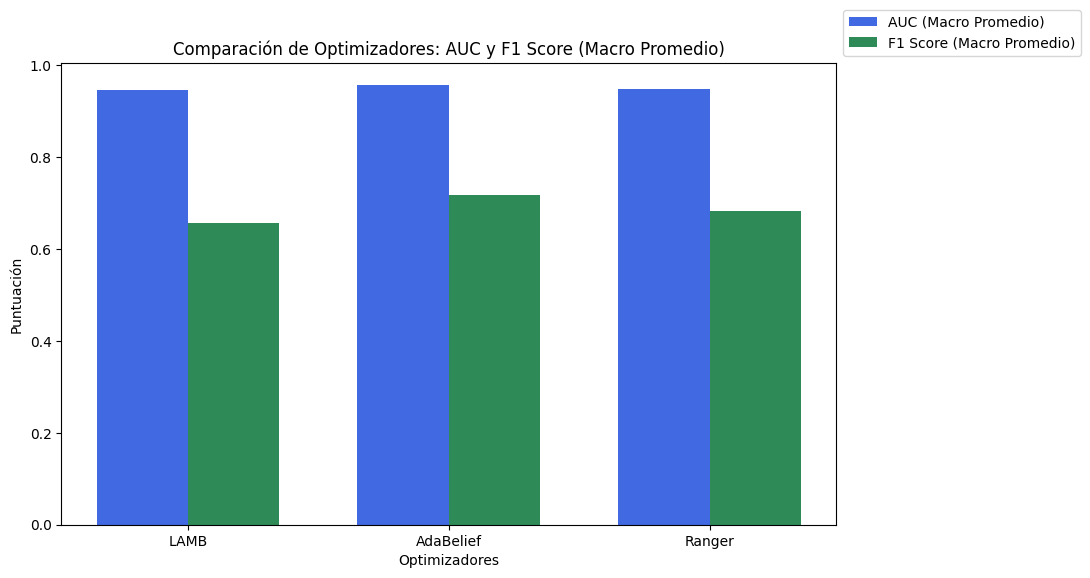

In [ ]:
#######################################################
#
#   Gráfica comparativa de los optimizadores externos
#
#######################################################

optimizers = ['LAMB', 'AdaBelief', 'Ranger']
auc_scores = [auc_score_lamb, auc_score_adabelief, auc_score_ranger]
f1_scores = [f1_lamb, f1_adabelief, f1_ranger]

x = np.arange(len(optimizers))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))

bars_auc = ax.bar(x - width/2, auc_scores, width, label='AUC (Macro Promedio)', color='royalblue')
bars_f1 = ax.bar(x + width/2, f1_scores, width, label='F1 Score (Macro Promedio)', color='seagreen')

ax.set_xlabel('Optimizadores')
ax.set_ylabel('Puntuación')
ax.set_title('Comparación de Optimizadores: AUC y F1 Score (Macro Promedio)')
ax.set_xticks(x)
ax.set_xticklabels(optimizers)
ax.legend(loc='lower left', bbox_to_anchor=(1, 1))

Test de Wilcoxon

In [ ]:
########################################################
#
#   Validación cruzada sobre los distintos optimizadores
#
########################################################

from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=24)
auc_scores = {'LAMB': [], 'AdaBelief': [], 'Ranger': []}
f1_scores = {'LAMB': [], 'AdaBelief': [], 'Ranger': []}
optimizers = {'LAMB': lamb_optimizer, 'AdaBelief': adabelief_optimizer, 'Ranger': ranger_optimizer}

for name, optimizer in optimizers.items():
    print(f"Entrenando con el optimizador: {name}")

    for train_index, val_index in skf.split(X, y):
        X_train, X_val = X[train_index], X[val_index]
        y_train, y_val = y[train_index], y[val_index]

        model = None
        model = create_model_n_layers_n_filters(3, 32, size=16)
        model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

        history = model.fit(X_train, y_train, epochs=15, batch_size=batch_size, verbose=0)

        y_pred_multiclass = model.predict(X_val)
        y_pred = np.argmax(y_pred_multiclass, axis=1)
        y_val_one_hot = tf.keras.utils.to_categorical(y_val, num_classes=8)

        auc_score = roc_auc_score(y_val_one_hot, y_pred_multiclass, average='macro', multi_class='ovr')
        f1 = f1_score(y_val, y_pred, average='macro')

        auc_scores[name].append(auc_score)
        f1_scores[name].append(f1)
    print(f"Optimización con {name} completada. AUC medio: {np.mean(auc_scores[name]):.4f}, F1 Score medio: {np.mean(f1_scores[name]):.4f}")


Entrenando con el optimizador: LAMB
16/16 [==============================] - 0s 6ms/step
Optimización con LAMB completada. AUC medio: 0.9432, F1 Score medio: 0.6289
Entrenando con el optimizador: AdaBelief
16/16 [==============================] - 0s 7ms/step
Optimización con AdaBelief completada. AUC medio: 0.9579, F1 Score medio: 0.6525
Entrenando con el optimizador: Ranger
16/16 [==============================] - 0s 6ms/step
Optimización con Ranger completada. AUC medio: 0.9568, F1 Score medio: 0.6975


In [ ]:
########################################################
#
#   Test de Wilcoxon de los distintos optimizadores
#
########################################################

from scipy.stats import wilcoxon

wilcoxon_results = []
optimizer_pairs = [('LAMB', 'AdaBelief'), ('LAMB', 'Ranger'), ('AdaBelief', 'Ranger')]

for opt1, opt2 in optimizer_pairs:
    stat, p_value = wilcoxon(auc_scores[opt1], auc_scores[opt2])
    wilcoxon_results.append((opt1, opt2, stat, p_value))

Gráfica comparativa del test estadístico de Wilcoxon


Resultados del Test de Wilcoxon (Valores p):
LAMB vs AdaBelief: Valor p = 0.0020
LAMB vs Ranger: Valor p = 0.0020
AdaBelief vs Ranger: Valor p = 0.3223


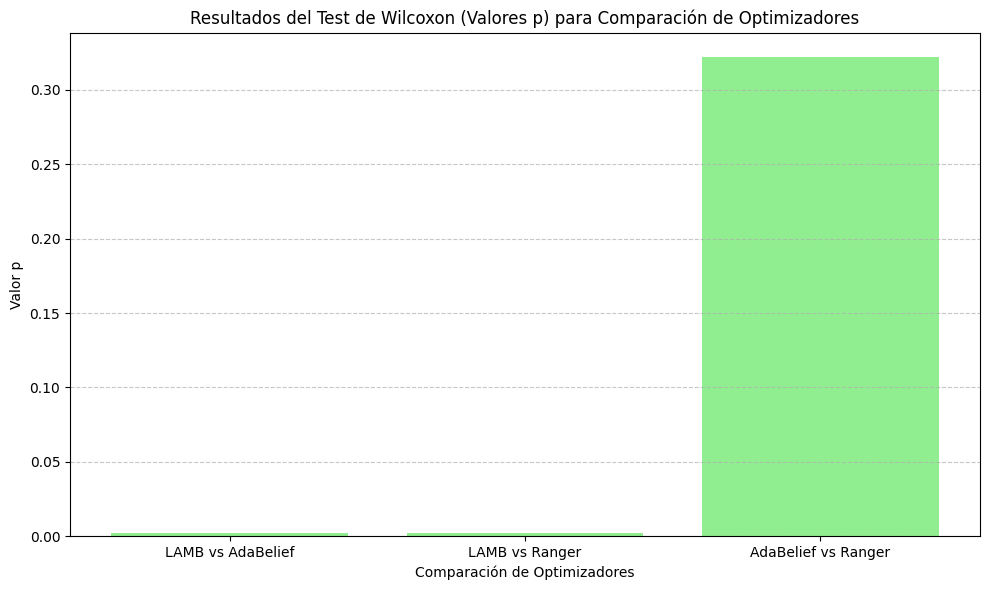

In [ ]:
#########################################################
#
#   Gráfica comparativa del test estadístico de Wilcoxon
#
#########################################################

optimizer_pairs = [('LAMB', 'AdaBelief'), ('LAMB', 'Ranger'), ('AdaBelief', 'Ranger')]
p_values = []

print("\nResultados del Test de Wilcoxon (Valores p):")
for opt1, opt2 in optimizer_pairs:
    _, p_value = wilcoxon(auc_scores[opt1], auc_scores[opt2])
    p_values.append(p_value)
    print(f"{opt1} vs {opt2}: Valor p = {p_value:.4f}")

labels = [f"{opt1} vs {opt2}" for opt1, opt2 in optimizer_pairs]
x = np.arange(len(labels))

fig, ax = plt.subplots(figsize=(10, 6))

bars_p_values = ax.bar(x, p_values, color='lightgreen')

ax.set_xlabel('Comparación de Optimizadores')
ax.set_ylabel('Valor p')
ax.set_title('Resultados del Test de Wilcoxon (Valores p) para Comparación de Optimizadores')
ax.set_xticks(x)
ax.set_xticklabels(labels)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


## **Avanzado**

Mejora con el uso de redes pre-entrenadas con fine-tunning

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Model
from sklearn.metrics import roc_auc_score
import numpy as np

In [ ]:
#########################################################
#
#   Uso de ResNet como red pre-entrenada
#
#########################################################

base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(32, 32, 3)) # modelo base con input de 32x32

for layer in base_model.layers:   # hacer que no se entrenen las capas
    layer.trainable = False

x = base_model.output
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(8, activation='softmax')(x)    # 8 clases de categorías

model = Model(inputs=base_model.input, outputs=output)

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

X_train_resized = tf.image.resize(X_train, (32, 32))
X_val_resized = tf.image.resize(X_val, (32, 32))

history = model.fit(X_train_resized, y_train, epochs=50, validation_data=(X_val_resized, y_val), batch_size=batch_size, verbose=1)


y_pred_pre = model.predict(X_val_resized)
y_val_one_hot = tf.keras.utils.to_categorical(y_val, num_classes=8)
auc_score = roc_auc_score(y_val_one_hot, y_pred_pre, average='macro', multi_class='ovr')

print(f"AUC (Area Under the Curve) para el conjunto de validación: {auc_score:.4f}")

Epoch 1/50
71/71 [==============================] - 22s 257ms/step - loss: 2.7871 - accuracy: 0.1313 - val_loss: 2.0745 - val_accuracy: 0.1460
Epoch 2/50
71/71 [==============================] - 17s 236ms/step - loss: 2.1226 - accuracy: 0.1336 - val_loss: 2.0586 - val_accuracy: 0.2020
Epoch 3/50
71/71 [==============================] - 17s 248ms/step - loss: 2.0616 - accuracy: 0.1573 - val_loss: 2.0485 - val_accuracy: 0.2260
Epoch 4/50
71/71 [==============================] - 16s 229ms/step - loss: 2.0498 - accuracy: 0.1904 - val_loss: 2.0365 - val_accuracy: 0.2880
Epoch 5/50
71/71 [==============================] - 17s 241ms/step - loss: 2.0426 - accuracy: 0.1876 - val_loss: 2.0309 - val_accuracy: 0.3360
Epoch 6/50
71/71 [==============================] - 16s 222ms/step - loss: 2.0325 - accuracy: 0.1869 - val_loss: 2.0167 - val_accuracy: 0.2460
Epoch 7/50
71/71 [==============================] - 17s 238ms/step - loss: 2.0219 - accuracy: 0.1867 - val_loss: 2.0100 - val_accuracy: 0.2360

# Capítulo II

# Librerías necesarias

In [1]:
import numpy as np
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.stem.snowball import SnowballStemmer

## **Básico**

Cargar el dataset que vamos a utilizar

In [2]:
#################################
#
#   Cargar el dataset
#
#################################

url = 'https://www.dlsi.ua.es/~juanra/UA/dataset/dcadep/dcadep_melt_grades.csv.gz'
data = pd.read_csv(url, sep='\t', decimal=',')

data.fillna('', inplace=True)
print(data.head())

batch_size = 32
epochs = 20

   activity  year  group  evaluator  work section  value  \
0         1  2015      1          1     1       1    3.0   
1         1  2015      1          2     1       1    2.0   
2         1  2015      1          3     1       1    3.0   
3         1  2015      1          4     1       1    3.0   
4         1  2015      1          5     1       1    3.0   

                        feedback  
0                                 
1  No ha puesto el símbolo de CC  
2                                 
3                                 
4                                 


Ejemplo para ver cuáles son las stopwords

In [3]:
nltk.download('stopwords')  # descargar stopwords
stopwords_es = set(stopwords.words('spanish'))
print(stopwords_es)

{'tengo', 'eras', 'fuesen', 'estábamos', 'habríais', 'teniendo', 'habrás', 'estarán', 'sintiendo', 'son', 'sentido', 'yo', 'tengas', 'estemos', 'durante', 'tienes', 'teníais', 'habiendo', 'tenemos', 'hubieron', 'nos', 'algo', 'está', 'e', 'cual', 'nuestros', 'será', 'estuvimos', 'tuviesen', 'tuvierais', 'ya', 'vosotros', 'han', 'estados', 'estén', 'mí', 'estuvieran', 'has', 'tu', 'habría', 'estaría', 'esté', 'tiene', 'esto', 'míos', 'tenida', 'estuve', 'estoy', 'habíais', 'el', 'habréis', 'tenga', 'tengáis', 'mi', 'sería', 'todos', 'contra', 'les', 'tengan', 'por', 'le', 'tuve', 'o', 'otra', 'uno', 'tenía', 'habremos', 'hubisteis', 'este', 'estabais', 'soy', 'habían', 'esta', 'tendrá', 'entre', 'tendremos', 'habré', 'tú', 'fuese', 'tengamos', 'hube', 'qué', 'habidas', 'tuvo', 'los', 'habíamos', 'tuvieras', 'muy', 'hubimos', 'serás', 'al', 'tenidas', 'sin', 'ellas', 'hubiste', 'te', 'serían', 'sean', 'seré', 'erais', 'nuestro', 'estad', 'nuestras', 'estamos', 'tuvimos', 'estarás', 'mía'

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Ejemplo de uso del proceso de preprocesar frases

In [4]:
###############################################
#
#   Ejemplo utilizado para entender el proceso
#
###############################################

nltk.download('stopwords')
tokenizer = RegexpTokenizer(r'\w+')  # tokeniza palabras alfanumericas
stemmer = SnowballStemmer("spanish", ignore_stopwords=True)  # stemming en español
stop_words = set(stopwords.words('spanish'))  # stopwords en español

frases = [
    "Estoy estudiando cómo funcionan las redes de procesamiento de lenguaje natural.",
    "Desafíos de programación es la mejor asignatura, ¿verdad?"
]

frases_preprocesadas = []

for frase in frases:
    tokens = tokenizer.tokenize(frase.lower())
    stemmed_tokens = [stemmer.stem(word) for word in tokens if word not in stop_words]
    frases_preprocesadas.append(' '.join(stemmed_tokens))

for original, procesada in zip(frases, frases_preprocesadas):
    print(f"Original: {original}")
    print(f"Procesada: {procesada}")
    print("-" * 50)

Original: Estoy estudiando cómo funcionan las redes de procesamiento de lenguaje natural.
Procesada: estudi com funcion red proces lenguaj natural
--------------------------------------------------
Original: Desafíos de programación es la mejor asignatura, ¿verdad?
Procesada: desafi program mejor asignatur verd
--------------------------------------------------


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Preprocesado básico de palabras (minúsculas, lemmas, caracteres especiales y
stopwords)

In [5]:
##################################
#
#   Preprocesado de feedback
#
##################################

nltk.download('stopwords')
tokenizer = RegexpTokenizer(r'\w+')  # tokeniza palabras alfanumericas
stemmer = SnowballStemmer("spanish", ignore_stopwords=True)  # stemming en español
stop_words = set(stopwords.words('spanish'))  # stopwords en español

feedback_preprocesado = []  # copia donde almacenaremos el nuevo feedback preprocesado

for feedback in data['feedback']:
    if feedback:
        tokens = tokenizer.tokenize(feedback.lower())   # tokenizamos el feedback de esa entrada
        stemmed_tokens = [stemmer.stem(word) for word in tokens if word not in stop_words]  # stemming en español del feedback eliminando stopwords
        feedback_preprocesado.append(' '.join(stemmed_tokens))  # lo añadimos
    else:
        feedback_preprocesado.append('')  # si es vacio se mantiene vacio

data['feedback prep'] = feedback_preprocesado
print(data[['feedback', 'feedback prep']].head(10))  # mostrar feedback original y preprocesado	de las 10 primeras entradas


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


                                            feedback  \
0                                                      
1                      No ha puesto el símbolo de CC   
2                                                      
3                                                      
4                                                      
5                                                 Ok   
6                                                      
7                                                      
8  Este trabajo posee introducción, en la cual se...   
9  La imagen no es correcta debe aparecer la imag...   

                                     feedback prep  
0                                                   
1                                  puest simbol cc  
2                                                   
3                                                   
4                                                   
5                                               ok  
6           

Filtrar por los que no están vacíos para mostrar más ejemplos

In [6]:
#################################################
#
#  Mostrar el preprocesado de feedback no vacíos
#
#################################################

feedback_no_vacio = data[data['feedback prep'] != '']
for _, row in feedback_no_vacio[['feedback', 'feedback prep']].head(4).iterrows():  # solo los 4 primeros feedback no vacíos
    print(f"feedback: {row['feedback']} | feedback prep: {row['feedback prep']}")

feedback: No ha puesto el símbolo de CC | feedback prep: puest simbol cc
feedback: Ok | feedback prep: ok
feedback: Este trabajo posee introducción, en la cual se indica el tema. Muy bien presentado. | feedback prep: trabaj pose introduccion indic tem bien present
feedback: La imagen no es correcta debe aparecer la imagen completa con todos los elementos. | feedback prep: imag correct deb aparec imag complet element


Librerías necesarias

In [7]:
from sklearn.model_selection import KFold            # validacion cruzada
from sklearn.feature_extraction.text import CountVectorizer   # BoW
from sklearn.metrics import mean_absolute_error

from tensorflow.keras.models import Sequential      # creacion del modelo regresor
from tensorflow.keras.layers import Dense, Dropout

import matplotlib.pyplot as plt     # gráficas

Creación del modelo (regresor)

In [40]:
#############################################
#
#     Creación del modelo regresor
#
#############################################

def create_regressor_model(X, y): # X sin transformar
    model = Sequential([
        Dense(128, activation='relu', input_shape=(X_vectorizado.shape[1],)),    # capa de entrada
        Dropout(0.2),
        Dense(64, activation='relu'),
        Dense(1, activation='linear')     # capa de salida para prediccion continua
    ])

    return model

Ejemplo de matrices dispersa y densa

In [ ]:
#############################################
#
#     Ejemplo de matriz dispersa y densa
#
#############################################
vectorizador = CountVectorizer()
X_dispersa = vectorizador.fit_transform(["El gato corre", "El perro corre"])

X_densa = X_dispersa.toarray()

print("Matriz dispersa:\n", X_dispersa)
print("Matriz densa:\n", X_densa)

Matriz dispersa:
   (0, 1)	1
  (0, 2)	1
  (0, 0)	1
  (1, 1)	1
  (1, 0)	1
  (1, 3)	1
Matriz densa:
 [[1 1 1 0]
 [1 1 0 1]]


Aplicación de la validación cruzada (10-CV)

In [ ]:
#############################################
#
#     Aplicación de la validación cruzada
#
#############################################

X = data['feedback prep']     # texto procesado
y = data['value']             # variable objetivo

vectorizador = CountVectorizer(max_features=500)  # BoW con las 500 palabras más importantes
X_vectorizado = vectorizador.fit_transform(X)

kf = KFold(n_splits=10)   # configuracion de la validacion cruzada
mae_scores = []

for train_index, test_index in kf.split(X_vectorizado):
    X_train, X_test = X_vectorizado[train_index], X_vectorizado[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    X_train = X_train.toarray()     # lo transformamos a formato denso
    X_test = X_test.toarray()

    model = create_regressor_model(X_train, y_train)
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

    model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=0)

    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mae_scores.append(mae)
    print(f"MAE: {mae}")

print(f"MAE promedio: {np.mean(mae_scores)}")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
MAE: 1.2399653653727936


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
MAE: 0.8690060349618005


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
MAE: 1.4574097711673837


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
MAE: 1.474203507031841


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
MAE: 0.9594195653793965


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
MAE: 0.32799301235640094


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
MAE: 0.3731700010114772


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
MAE: 0.3920061335263515


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
MAE: 0.4758547944035947


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
MAE: 2.637220461040724
MAE promedio: 1.0206248646251763


Gráfica comparativa para cada Fold

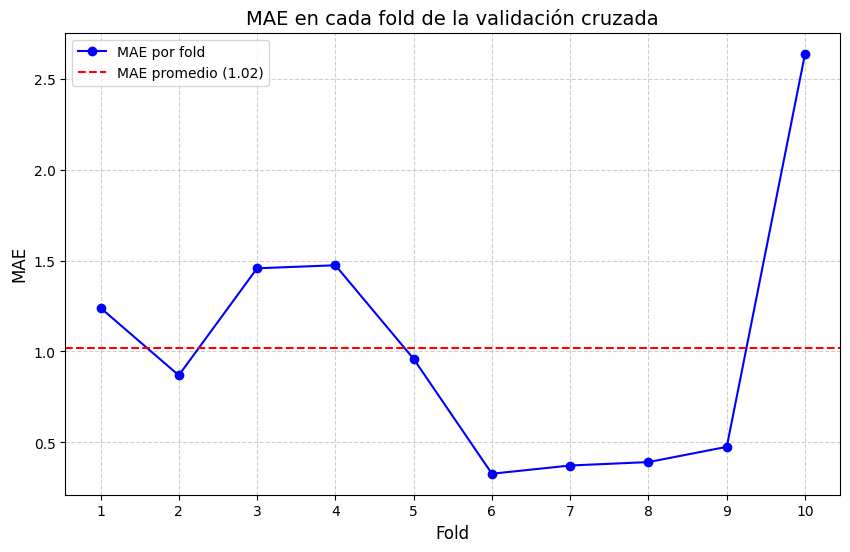

In [ ]:
#############################################
#
#     Gráfica comparativa de MAE por Fold
#
#############################################

folds = range(1, len(mae_scores) + 1)  # cantidad de folds
plt.figure(figsize=(10, 6))
plt.plot(folds, mae_scores, marker='o', linestyle='-', color='b', label='MAE por fold')
plt.axhline(np.mean(mae_scores), color='r', linestyle='--', label=f'MAE promedio ({np.mean(mae_scores):.2f})')

plt.title('MAE en cada fold de la validación cruzada', fontsize=14)
plt.xlabel('Fold', fontsize=12)
plt.ylabel('MAE', fontsize=12)
plt.xticks(folds)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)

plt.show()

Aplicación de un par de redes neuronales

Modelo BoW

In [38]:
#########################
#
#  Modelo de red BoW
#
#########################

def create_bow_model(X):
    model = Sequential([
        Dense(128, activation='relu', input_shape=(X,)),
        Dropout(0.2),
        Dense(64, activation='relu'),
        Dense(1, activation='linear')  # salida de predicciones continua
    ])
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
    return model

In [41]:
###############################################################
#
#     Aplicación de la validación cruzada con modelo BoW
#
###############################################################

X = data['feedback prep']     # texto procesado
y = data['value']             # variable objetivo

vectorizador = CountVectorizer(max_features=500)  # BoW con las 500 palabras más importantes
X_vectorizado = vectorizador.fit_transform(X)

kf = KFold(n_splits=10, shuffle=True, random_state=24)   # configuracion de la validacion cruzada
mae_bow_scores = []

for train_index, test_index in kf.split(X_vectorizado):
    X_train, X_test = X_vectorizado[train_index], X_vectorizado[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    X_train = X_train.toarray()     # lo transformamos a formato denso
    X_test = X_test.toarray()

    model = create_regressor_model(X_train, y_train)
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

    model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=0)

    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mae_bow_scores.append(mae)
    print(f"MAE: {mae}")

print(f"MAE promedio: {np.mean(mae_bow_scores)}")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
MAE: 0.9702849562661477


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
MAE: 0.895619248174103


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
MAE: 0.9372602586866763


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
MAE: 0.9452977819724029


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
MAE: 0.9108535723349128


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
MAE: 0.9018606169772952


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
MAE: 0.9387915010731871


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
MAE: 0.8905214511106505


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
MAE: 0.8539940128236194


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
MAE: 0.8701719440249032
MAE promedio: 0.9114655343443898


Modelo LSTM (RNN)

In [10]:
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [42]:
#########################
#
#  Modelo de red LSTM
#
#########################

def create_lstm_model(vocab_size, embedding_dim=50, input_length=10):
    model = Sequential([
        Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=input_length),
        LSTM(64, return_sequences=False),  # LSTM con 64 unidades
        Dropout(0.2),
        Dense(32, activation='relu'),
        Dense(1, activation='linear')
    ])
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
    return model

In [43]:
###############################################################
#
#     Aplicación de la validación cruzada con modelo LSTM
#
###############################################################

kf = KFold(n_splits=10, shuffle=True, random_state=24)   # configuracion de la validacion cruzada
mae_lstm_scores = []

tokenizer = Tokenizer(num_words=500)    # tokenizer para convertir texto en secuencia numerica
tokenizer.fit_on_texts(data['feedback prep'])   # asociar valor a cada palabra de esa columna
sequences = tokenizer.texts_to_sequences(data['feedback prep']) # convertir a secuencia de indices
X_sequence = pad_sequences(sequences, maxlen=50)   # rellenar secuencias
y = np.array(data['value'])               # convertir a numpy array para usarlo en keras

for train_index, test_index in kf.split(X_sequence):                # el resto igual que en cualquier otro modelo
    X_train, X_test = X_sequence[train_index], X_sequence[test_index]
    y_train, y_test = y[train_index], y[test_index]

    model = create_lstm_model(vocab_size=500, input_length=50, embedding_dim=50)
    model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=0)

    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mae_lstm_scores.append(mae)
    print(f"MAE: {mae}")

print(f"MAE promedio: {np.mean(mae_lstm_scores)}")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
MAE: 0.9056600752908192


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
MAE: 0.8847782549764334


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
MAE: 0.9552904533759485


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
MAE: 0.92748493838846


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
MAE: 0.9168663901648718


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
MAE: 0.897558916226755


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
MAE: 0.9266037117970396


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
MAE: 0.9325237985495191


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
MAE: 0.8866358305774588


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
MAE: 0.8302681766386201
MAE promedio: 0.9063670545985927


Gráfica comparativa de los dos modelos

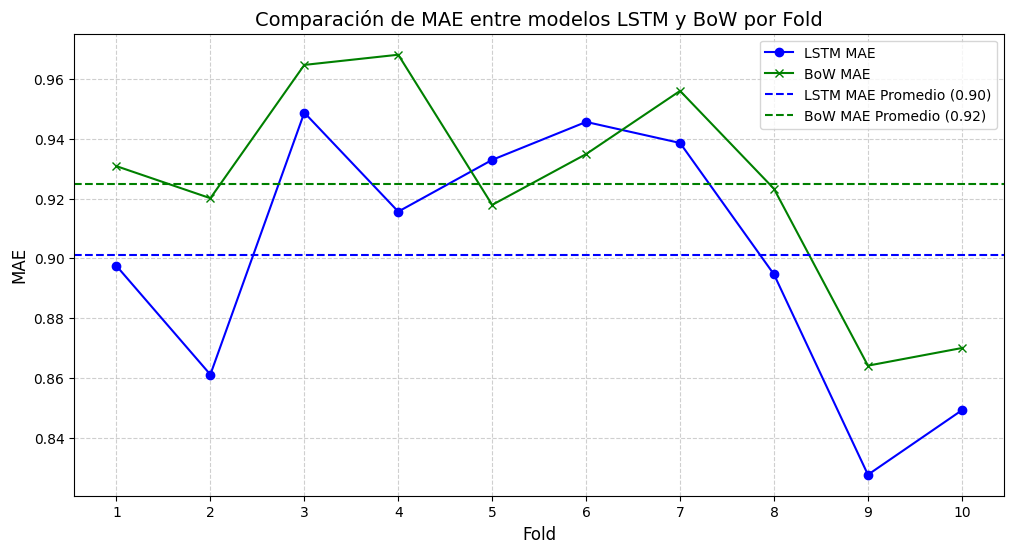

In [ ]:
##############################################
#
#    Gráfica comparativa de los dos modelos
#
#############################################

plt.figure(figsize=(12, 6))
folds = range(1, len(mae_lstm_scores) + 1)

plt.plot(folds, mae_lstm_scores, marker='o', linestyle='-', color='b', label='LSTM MAE')
plt.plot(folds, mae_bow_scores, marker='x', linestyle='-', color='g', label='BoW MAE')

plt.axhline(np.mean(mae_lstm_scores), color='b', linestyle='--', label=f'LSTM MAE Promedio ({np.mean(mae_lstm_scores):.2f})')
plt.axhline(np.mean(mae_bow_scores), color='g', linestyle='--', label=f'BoW MAE Promedio ({np.mean(mae_bow_scores):.2f})')

plt.title('Comparación de MAE entre modelos LSTM y BoW por Fold', fontsize=14)
plt.xlabel('Fold', fontsize=12)
plt.ylabel('MAE', fontsize=12)
plt.xticks(folds)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)

plt.show()

Evaluación de la redes por actividad 1

In [ ]:
##########################################
#
#   Evaluación de la actividad 1 (BoW)
#
##########################################

actividad_1 = data[data['activity'] == 1]   # solo contiene los datos de la actividad 1

vectorizador_1 = CountVectorizer(max_features=500)        # BoW con las 500 palabras más importantes
X_bow_1 = vectorizador_1.fit_transform(actividad_1['feedback prep'])
y_bow_1 = np.array(actividad_1['value'])    # convertirlo a numpy array

kf = KFold(n_splits=10, shuffle=True, random_state=24)    # configuracion de la validacion cruzada
mae_bow_1 = []

for train_index, test_index in kf.split(X_bow_1):
    X_train, X_test = X_bow_1[train_index].toarray(), X_bow_1[test_index].toarray()
    y_train, y_test = y_bow_1[train_index], y_bow_1[test_index]

    model = create_bow_model(X_train.shape[1])
    model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=0)

    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mae_bow_1.append(mae)

print(f"MAE promedio para actividad 1 (BoW): {np.mean(mae_bow_1)}")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
MAE promedio para actividad 1 (BoW): 1.2622189274444653


In [ ]:
##########################################
#
#   Evaluación de la actividad 1 (LSTM)
#
##########################################

actividad_1 = data[data['activity'] == 1]   # solo contiene los datos de la actividad 1

tokenizer_1 = Tokenizer(num_words=500)
tokenizer_1.fit_on_texts(actividad_1['feedback prep'])    # tokenizamos feedback prep de act1
sequences_1 = tokenizer_1.texts_to_sequences(actividad_1['feedback prep'])    # lo convertimos en secuencias
X_seq_1 = pad_sequences(sequences_1, maxlen=50)     # ponemos todas las secuencias a una long max de 50
y_1 = np.array(actividad_1['value'])    # lo convertimos a numpy array

kf = KFold(n_splits=10, shuffle=True, random_state=24)    # configuracion de la validacion cruzada
mae_lstm_1 = []

for train_index, test_index in kf.split(X_seq_1):
    X_train, X_test = X_seq_1[train_index], X_seq_1[test_index]
    y_train, y_test = y_1[train_index], y_1[test_index]

    model = create_lstm_model(vocab_size=500, input_length=50, embedding_dim=50)
    model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=0)

    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mae_lstm_1.append(mae)

print(f"MAE promedio para actividad 1 (LSTM): {np.mean(mae_lstm_1)}")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
MAE promedio para actividad 1 (LSTM): 1.2528050075356374


Gráfica comparativa para cada uno de los modelos

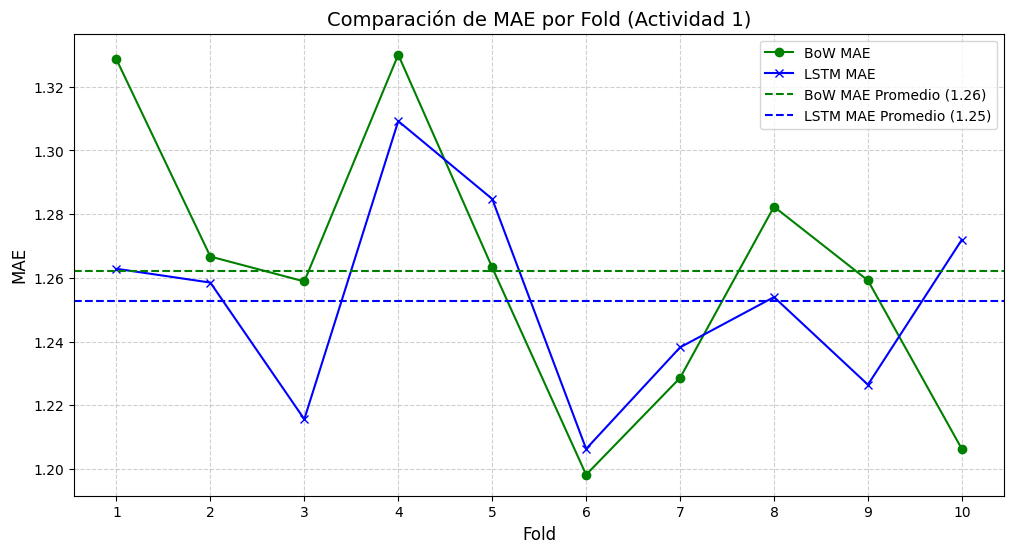

In [ ]:
##############################################################
#
#   Gráfica comparativa para la actividad 1 de ambos modelos
#
##############################################################

plt.figure(figsize=(12, 6))

folds = range(1, len(mae_bow_1) + 1)
plt.plot(folds, mae_bow_1, marker='o', linestyle='-', color='g', label='BoW MAE')
plt.plot(folds, mae_lstm_1, marker='x', linestyle='-', color='b', label='LSTM MAE')
plt.axhline(np.mean(mae_bow_1), color='g', linestyle='--', label=f'BoW MAE Promedio ({np.mean(mae_bow_1):.2f})')
plt.axhline(np.mean(mae_lstm_1), color='b', linestyle='--', label=f'LSTM MAE Promedio ({np.mean(mae_lstm_1):.2f})')

plt.title('Comparación de MAE por Fold (Actividad 1)', fontsize=14)
plt.xlabel('Fold', fontsize=12)
plt.ylabel('MAE', fontsize=12)
plt.xticks(folds)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)

plt.show()

Test de Wilcoxon

In [ ]:
from scipy.stats import wilcoxon

Aplicación del Test de Wilcoxon

In [ ]:
#####################################
#
#   Aplicación del Test de Wilcoxon
#
#####################################

stat, p_value = wilcoxon(mae_bow_1, mae_lstm_1)

if p_value < 0.05:
    print(f"Diferencia significativa (p = {p_value:.4f})")
else:
    print(f"No hay diferencia significativa (p = {p_value:.4f})")

No hay diferencia significativa (p = 0.6250)


Aplicación del Test de Wilcoxon (ambas actividades)

In [ ]:
#############################################################
#
#   Aplicación del Test de Wilcoxon para ambas actividades
#
#############################################################

stat, p_value = wilcoxon(mae_bow_scores, mae_lstm_scores)

if p_value < 0.05:
    print(f"Diferencia significativa (p = {p_value:.4f})")
else:
    print(f"No hay diferencia significativa (p = {p_value:.4f})")

Diferencia significativa (p = 0.0098)


## **Medio**

Aplicar más arquitecturas de redes distintas a la del apartado básico

In [45]:
#############################################################
#
#   Modelo de red CNN para capturar patrones en el texto
#
#############################################################

from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten

def create_cnn_model(vocab_size=5000, embedding_dim=50, input_length=100):
    model = Sequential([
        Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=input_length),
        Conv1D(filters=128, kernel_size=5, activation='relu'),  # kernel_size tamaño del filtro para capturar patrones
        MaxPooling1D(pool_size=2),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='linear')  # linear para salida continua (regresion)
    ])
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
    return model


Aplicación de la validación cruzada a red CNN

In [46]:
#####################################
#
#   Aplicación de 10-CV a red CNN
#
#####################################

tokenizer = Tokenizer(num_words=5000)  # 500 palabras mas frecuentes
tokenizer.fit_on_texts(data['feedback prep'])

sequences = tokenizer.texts_to_sequences(data['feedback prep'])

X = pad_sequences(sequences, maxlen=100)
y = np.array(data['value'])

kf = KFold(n_splits=10, shuffle=True, random_state=24)
mae_scores_cnn = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    model = create_cnn_model(vocab_size=5000, embedding_dim=50, input_length=100)
    model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=0)

    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mae_scores_cnn.append(mae)

print(f"MAE promedio: {np.mean(mae_scores_cnn)}")


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
MAE promedio: 0.9049024019233116


Aplicación de la validación cruzada a red GRU

In [47]:
#########################
#
#   Modelo de red GRU
#
#########################

from tensorflow.keras.layers import GRU

def create_gru_model(vocab_size, embedding_dim=50, input_length=100):
    model = Sequential([
        Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=input_length),
        GRU(64, return_sequences=False),
        Dropout(0.2),
        Dense(64, activation='relu'),
        Dense(1, activation='linear')
    ])
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
    return model


In [48]:
#####################################
#
#   Aplicación de 10-CV a red GRU
#
#####################################

tokenizer = Tokenizer(num_words=5000)    # igual que en la CNN
tokenizer.fit_on_texts(data['feedback prep'])

sequences = tokenizer.texts_to_sequences(data['feedback prep'])

X = pad_sequences(sequences, maxlen=100)
y = np.array(data['value'])

kf = KFold(n_splits=10, shuffle=True, random_state=24)
mae_scores_gru = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    model = create_gru_model(vocab_size=5000, embedding_dim=50, input_length=100)
    model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=0)

    y_pred = model.predict(X_test).flatten()  # aplanar para que coincida con y_test
    mae = mean_absolute_error(y_test, y_pred)
    mae_scores_gru.append(mae)
    print(f"MAE del fold: {mae}")

print(f"MAE promedio: {np.mean(mae_scores_gru)}")


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
MAE del fold: 0.9033685321687313


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
MAE del fold: 0.8759394126170584


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
MAE del fold: 0.9276844560876768


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
MAE del fold: 0.9148069216227265


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
MAE del fold: 0.8974890422731749


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
MAE del fold: 0.9477160663082359


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
MAE del fold: 0.931393392617982


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
MAE del fold: 0.9355285268122


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
MAE del fold: 0.8520407536361226


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
MAE del fold: 0.8292915005190804
MAE promedio: 0.9015258604662989


Gráfica comparativa de los modelos CNN y GRU


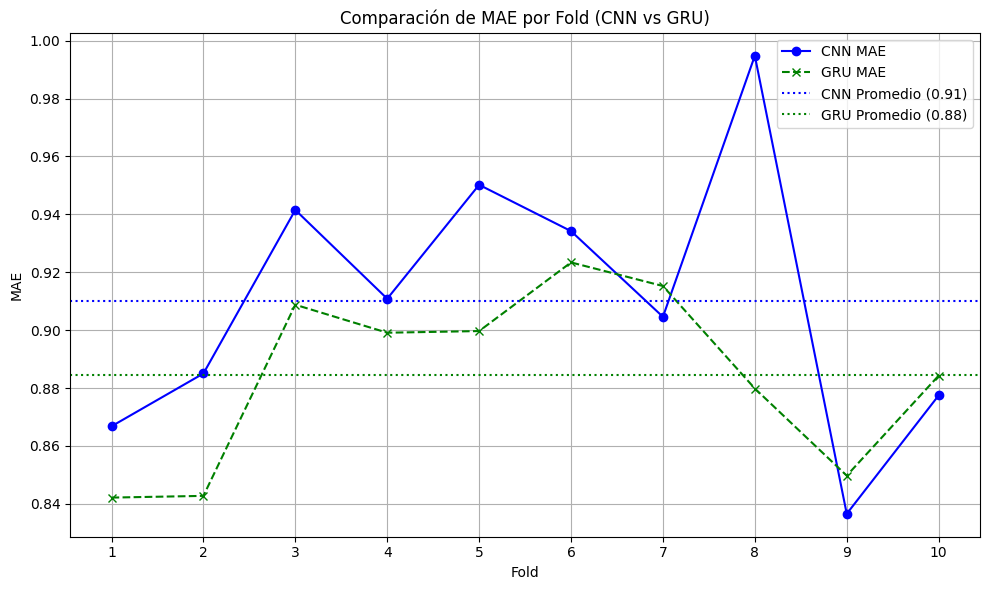

In [ ]:
######################################
#
#   Gráfica comparativa de CNN y GRU
#
######################################

folds = range(1, len(mae_scores_cnn) + 1)

plt.figure(figsize=(10, 6))
plt.plot(folds, mae_scores_cnn, marker='o', label='CNN MAE', linestyle='-', color='blue')
plt.plot(folds, mae_scores_gru, marker='x', label='GRU MAE', linestyle='--', color='green')

plt.axhline(y=sum(mae_scores_cnn) / len(mae_scores_cnn), color='blue', linestyle='dotted', label=f'CNN Promedio ({sum(mae_scores_cnn) / len(mae_scores_cnn):.2f})')
plt.axhline(y=sum(mae_scores_gru) / len(mae_scores_gru), color='green', linestyle='dotted', label=f'GRU Promedio ({sum(mae_scores_gru) / len(mae_scores_gru):.2f})')

plt.title('Comparación de MAE por Fold (CNN vs GRU)')
plt.xlabel('Fold')
plt.ylabel('MAE')
plt.xticks(folds)
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()

Ajustes combinados (número de capas, tipo de capas, normalización)

Nuevo modelo CNN modificado

In [12]:
#########################################
#
#   Nuevo modelo de red CNN modificada
#
#########################################

from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, BatchNormalization

def create_new_cnn_model(vocab_size=5000, embedding_dim=50, input_length=100):
    model = Sequential([
        Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=input_length),
        Conv1D(filters=128, kernel_size=5, activation='relu'),  # kernel_size tamaño del filtro para capturar patrones
        BatchNormalization(),       # normalizacion para estabilizar el entrenamiento
        MaxPooling1D(pool_size=2),
        Conv1D(filters=64, kernel_size=3, activation='relu'),  # segunda capa convolucional
        MaxPooling1D(pool_size=2),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='linear')  # linear para salida continua (regresion)
    ])
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
    return model

In [20]:
#############################################
#
#   Aplicación de 10-CV a red CNN modifcada
#
#############################################

tokenizer = Tokenizer(num_words=5000)  # 5000 palabras mas frecuentes
tokenizer.fit_on_texts(data['feedback prep'])

sequences = tokenizer.texts_to_sequences(data['feedback prep'])   # secuencia numerica basada en mas frecuente

X = pad_sequences(sequences, maxlen=100)    # maxlen de secuencia 100
y = np.array(data['value'])

kf = KFold(n_splits=10, shuffle=True, random_state=24)      # config del 10CV
mae_scores_new_cnn = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    model = create_new_cnn_model(vocab_size=5000, embedding_dim=50, input_length=100)
    model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=0)

    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mae_scores_new_cnn.append(mae)

print(f"MAE promedio: {np.mean(mae_scores_new_cnn)}")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
MAE promedio: 1.1992068527318676


Nuevo modelo de red GRU modificada

In [16]:
#########################
#
#   Modelo de red GRU
#
#########################

from tensorflow.keras.layers import GRU, Bidirectional

def create_new_gru_model(vocab_size, embedding_dim=50, input_length=100):
    model = Sequential([
        Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=input_length),
        Bidirectional(GRU(64, return_sequences=True)),  # capa bidireccional
        BatchNormalization(),  # normalizacion despues de GRU
        Dropout(0.2),
        GRU(32),    # segunda capa GRU
        Dense(64, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='linear')
    ])
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
    return model

In [17]:
#############################################
#
#   Aplicación de 10-CV a red GRU modifcada
#
#############################################

tokenizer = Tokenizer(num_words=5000)  # 5000 palabras mas frecuentes
tokenizer.fit_on_texts(data['feedback prep'])

sequences = tokenizer.texts_to_sequences(data['feedback prep'])   # secuencia numerica basada en mas frecuente

X = pad_sequences(sequences, maxlen=100)    # maxlen de secuencia 100
y = np.array(data['value'])

kf = KFold(n_splits=10, shuffle=True, random_state=24)      # config del 10CV
mae_scores_new_gru = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    model = create_new_gru_model(vocab_size=5000, embedding_dim=50, input_length=100)
    model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=0)

    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mae_scores_new_gru.append(mae)

print(f"MAE promedio: {np.mean(mae_scores_new_gru)}")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


84/84 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step
MAE promedio: 0.9203860592198486


Gráfica comparativa para cada modelo modificado

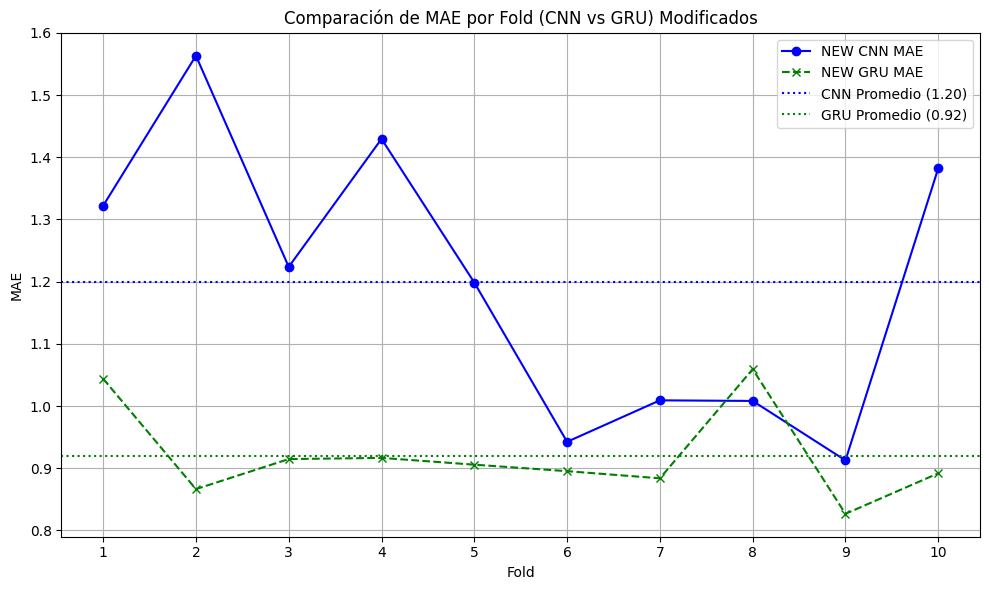

In [21]:
##################################################
#
#   Gráfica comparativa de CNN y GRU modificados
#
##################################################

folds = range(1, len(mae_scores_new_cnn) + 1)

plt.figure(figsize=(10, 6))
plt.plot(folds, mae_scores_new_cnn, marker='o', label='NEW CNN MAE', linestyle='-', color='blue')
plt.plot(folds, mae_scores_new_gru, marker='x', label='NEW GRU MAE', linestyle='--', color='green')

plt.axhline(y=sum(mae_scores_new_cnn) / len(mae_scores_new_cnn), color='blue', linestyle='dotted', label=f'CNN Promedio ({sum(mae_scores_new_cnn) / len(mae_scores_new_cnn):.2f})')
plt.axhline(y=sum(mae_scores_new_gru) / len(mae_scores_new_gru), color='green', linestyle='dotted', label=f'GRU Promedio ({sum(mae_scores_new_gru) / len(mae_scores_new_gru):.2f})')

plt.title('Comparación de MAE por Fold (CNN vs GRU) Modificados')
plt.xlabel('Fold')
plt.ylabel('MAE')
plt.xticks(folds)
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()

Uso de redes pre-entrenadas aplicadas a nuestro problema

In [22]:
!pip install transformers     # instalar transformers

Uso de red pre-entrenada con Word Embeddings (GloVe)

In [23]:
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip glove.6B.zip     # descargar GloVe

--2024-12-06 12:04:42--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2024-12-06 12:04:42--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2024-12-06 12:04:42--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glov

In [24]:
#########################
#
#   Cargar la red GloVe
#
#########################

def load_glove_embeddings(filepath, vocab_size, embedding_dim, tokenizer):
    embeddings_index = {}
    with open(filepath, 'r', encoding='utf-8') as f:
        for line in f:
            values = line.split()
            word = values[0]
            coefs = np.asarray(values[1:], dtype='float32')
            embeddings_index[word] = coefs

    embedding_matrix = np.zeros((vocab_size, embedding_dim))    # matriz de embeddings
    for word, i in tokenizer.word_index.items():
        if i < vocab_size:
            embedding_vector = embeddings_index.get(word)
            if embedding_vector is not None:
                embedding_matrix[i] = embedding_vector

    return embedding_matrix

In [25]:
#########################
#
#   Crear modelo GloVe
#
#########################

def create_glove_model(embedding_matrix, input_length):
    model = Sequential([
        Embedding(input_dim=embedding_matrix.shape[0],
                  output_dim=embedding_matrix.shape[1],
                  weights=[embedding_matrix],
                  input_length=input_length,
                  trainable=False),       # congelado para que no se entrene
        Conv1D(filters=128, kernel_size=5, activation='relu'),
        MaxPooling1D(pool_size=2),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='linear')  # salida continua (regresion)
    ])
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
    return model

In [27]:
###################################
#
#   Aplicar 10-CV al modelo GloVe
#
###################################

tokenizer = Tokenizer(num_words=5000)           # preparativo de datos igual que en todos
tokenizer.fit_on_texts(data['feedback prep'])
sequences = tokenizer.texts_to_sequences(data['feedback prep'])
X = pad_sequences(sequences, maxlen=100)
y = np.array(data['value'])

embedding_matrix = load_glove_embeddings('glove.6B.50d.txt', vocab_size=5000, embedding_dim=50, tokenizer=tokenizer)    # cargar la matriz

kf = KFold(n_splits=10, shuffle=True, random_state=24)      # config del 10CV
mae_scores_glove = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    model = create_glove_model(embedding_matrix, input_length=100)
    model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=0)

    y_pred = model.predict(X_test).flatten()
    mae = mean_absolute_error(y_test, y_pred)
    mae_scores_glove.append(mae)

print(f"MAE promedio GloVe: {np.mean(mae_scores_glove)}")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
MAE promedio GloVe: 1.1328232439788877


Gráfica representativa para el modelo de red pre-entrenada GloVe

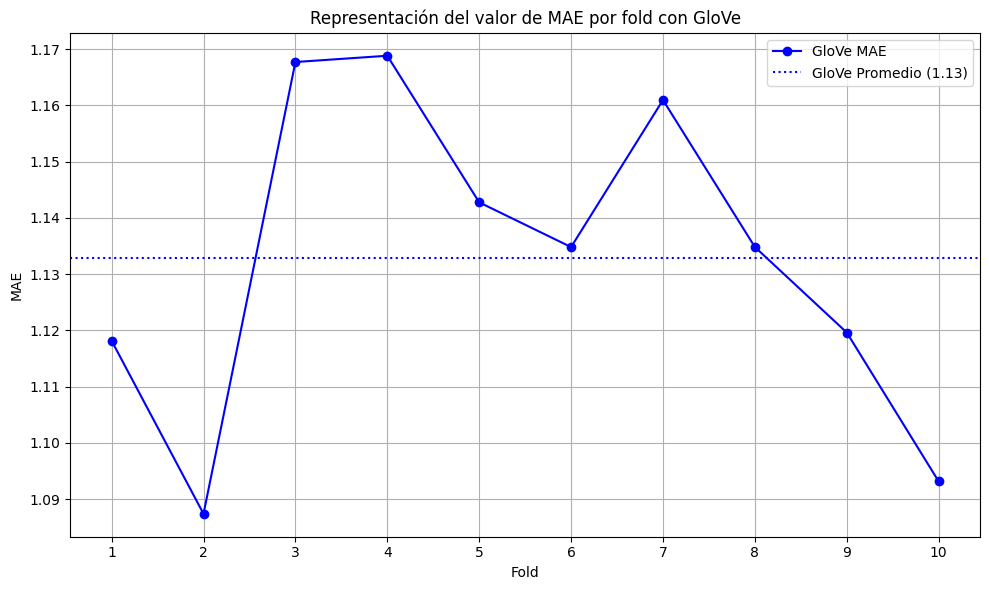

In [35]:
#########################################
#
#   Gráfica representativa de red GloVe
#
#########################################

folds = range(1, len(mae_scores_glove) + 1)

plt.figure(figsize=(10, 6))
plt.plot(folds, mae_scores_glove, marker='o', label='GloVe MAE', linestyle='-', color='blue')

plt.axhline(y=sum(mae_scores_glove) / len(mae_scores_glove), color='blue', linestyle='dotted', label=f'GloVe Promedio ({sum(mae_scores_glove) / len(mae_scores_glove):.2f})')

plt.title('Representación del valor de MAE por fold con GloVe')
plt.xlabel('Fold')
plt.ylabel('MAE')
plt.xticks(folds)
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()

Test de Wilcoxon sobre los modelos BoW, LSTM, CNN y GRU

In [36]:
from scipy.stats import wilcoxon

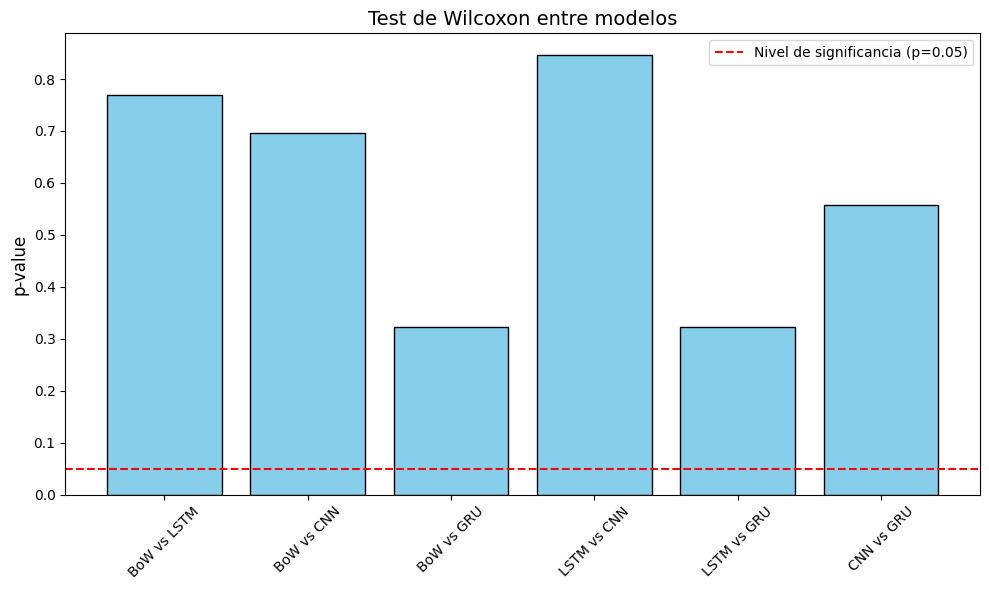

In [49]:
##################################################
#
#   Test de Wilcoxon sobre los distintos modelos
#
##################################################

p_bow_lstm = wilcoxon(mae_bow_scores, mae_lstm_scores).pvalue
p_bow_cnn = wilcoxon(mae_bow_scores, mae_scores_cnn).pvalue
p_bow_gru = wilcoxon(mae_bow_scores, mae_scores_gru).pvalue
p_lstm_cnn = wilcoxon(mae_lstm_scores, mae_scores_cnn).pvalue
p_lstm_gru = wilcoxon(mae_lstm_scores, mae_scores_gru).pvalue
p_cnn_gru = wilcoxon(mae_scores_cnn, mae_scores_gru).pvalue

comparisons = ['BoW vs LSTM', 'BoW vs CNN', 'BoW vs GRU',
               'LSTM vs CNN', 'LSTM vs GRU', 'CNN vs GRU']
p_values = [p_bow_lstm, p_bow_cnn, p_bow_gru, p_lstm_cnn, p_lstm_gru, p_cnn_gru]

plt.figure(figsize=(10, 6))
plt.bar(comparisons, p_values, color='skyblue', edgecolor='black')
plt.axhline(0.05, color='red', linestyle='--', label='Nivel de significancia (p=0.05)')
plt.title('Test de Wilcoxon entre modelos', fontsize=14)
plt.ylabel('p-value', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.legend()
plt.tight_layout()

plt.show()